In [109]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [110]:
# import data 
os.chdir('C:/Users/Cynthia Suprihanta/OneDrive/Aston University/Business Project/data')
df= pd.read_csv('27 july.csv')

In [111]:
df

,market_value,player_name,age,nationality,club_name,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,...,substitutes_in,substitutes_out,substitutes_bench,google_search,twitter_avgretweets,twitter_avglikes,youtube_avgview,youtube_avglike,youtube_avgdislike,youtube_avgcomment
0,5000000.00,thomas didillon,22,France,RSC Anderlecht,119580000.00,30,15,6,9,...,0.00,0.00,0.00,58500.00,0.00,0.00,1993.60,46.80,1.60,2.40
1,2000000.00,antonio milic,24,Croatia,RSC Anderlecht,119580000.00,30,15,6,9,...,5.00,3.00,12.00,36300.00,0.00,0.00,0.00,0.00,0.00,0.00
2,300000.00,abdoul karim dante,19,Mali,RSC Anderlecht,119580000.00,30,15,6,9,...,1.00,0.00,2.00,13600.00,0.00,0.00,3941.20,28.00,1.60,0.20
3,2800000.00,elias cobbaut,20,Belgium,RSC Anderlecht,119580000.00,30,15,6,9,...,2.00,3.00,4.00,51000.00,0.00,0.00,1718.67,36.00,0.67,0.33
4,2500000.00,andy najar,25,Honduras,RSC Anderlecht,119580000.00,30,15,6,9,...,4.00,4.00,6.00,26200.00,0.00,0.00,1213.00,24.00,0.00,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4518,2000000.00,bebe,27,Portugal,Eibar,53800000.00,38,11,14,13,...,1.00,1.00,1.00,2620000.00,0.00,0.00,350.00,14.00,1.00,1.00
4519,700000.00,pere milla,25,Spain,Eibar,53800000.00,38,11,14,13,...,0.00,4.00,16.00,443000.00,0.00,0.00,958.00,21.20,1.00,1.20
4520,1800000.00,pedro leon,31,Spain,Eibar,53800000.00,38,11,14,13,...,4.00,4.00,7.00,1830000.00,0.00,0.00,26189.33,267.67,12.33,7.33
4521,7500000.00,sergi enrich,28,Spain,Eibar,53800000.00,38,11,14,13,...,5.00,16.00,7.00,231000.00,0.00,0.00,985.60,43.60,0.40,4.60


# 1. Data Splitting 

In [112]:
# change the dependent variable into categorical type (10 class)
df["binned_mv"] = pd.qcut(df['market_value'], 10)

# check the value for each binned_mv class
value=df["binned_mv"].value_counts()
value


# do stratified sampling 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

train_index, test_index = list(stratified_splitter.split(df, df["binned_mv"]))[0]
strat_train_set = df.loc[train_index]
strat_test_set = df.loc[test_index]


def binned_mv_proportions(data):
    return data["binned_mv"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(df, test_size=0.2, random_state=7)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({"Overall": binned_mv_proportions(df),
                       "Random test set": binned_mv_proportions(rand_test_set),
                       "Stratified test set": binned_mv_proportions(strat_test_set),
                       }).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100


# delete binned_mv from trainset and testset
del strat_train_set["binned_mv"]
del strat_test_set["binned_mv"]

# change the name
trainset = strat_train_set
testset = strat_test_set

In [113]:
print(trainset.shape[0])
print(trainset.shape[1])
print(testset.shape[0])
print(testset.shape[1])

3618
57
905
57


# 2. Exploratory Data Analysis 

In [114]:
trainset.columns

Index(['market_value', 'player_name', 'age', 'nationality', 'club_name',
       'club_mv', 'club_match_played', 'club_match_won', 'club_match_draw',
       'club_match_lose', 'club_total_goals', 'club_goals_conceded', 'league',
       'contract_expired', 'position', 'dominant_foot', 'height', 'weight',
       'rating', 'captain', 'shots_total', 'shots_on', 'goals_total',
       'goals_conceded', 'goals_assists', 'passes_total', 'passes_key',
       'passes_accuracy', 'tackles_total', 'tackles_blocks',
       'tackles_interceptions', 'duels_total', 'duels_won',
       'dribbles_attempts', 'dribbles_success', 'fouls_drawn',
       'fouls_committed', 'cards_yellow', 'cards_yellowred', 'cards_red',
       'penalty_won', 'penalty_success', 'penalty_missed', 'penalty_saved',
       'games_appearences', 'games_minutes_played', 'games_lineups',
       'substitutes_in', 'substitutes_out', 'substitutes_bench',
       'google_search', 'twitter_avgretweets', 'twitter_avglikes',
       'youtube_avg

## 2.1 Univariate Non-Graphical 

In [115]:
# examine the frequency, mean, st. deviation, min value, max value, and IQR of Market Value
trainset['market_value'].describe()

count        3618.00
mean      6942039.80
std      13986134.19
min         25000.00
25%        700000.00
50%       2000000.00
75%       7000000.00
max     200000000.00
Name: market_value, dtype: float64

In [116]:
# the lowest market value and highest market value
lowest_mv=trainset[trainset['market_value'] == min(trainset['market_value'])]
highest_mv=trainset[trainset['market_value'] == max(trainset['market_value'])]

In [117]:
lowest_mv

,market_value,player_name,age,nationality,club_name,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,...,substitutes_in,substitutes_out,substitutes_bench,google_search,twitter_avgretweets,twitter_avglikes,youtube_avgview,youtube_avglike,youtube_avgdislike,youtube_avgcomment
4001,25000.00,dmitri belorukov,35,Russia,Anzhi,13180000.00,30,5,6,19,...,0.00,0.00,5.00,nan,0.00,0.00,0.00,0.00,0.00,0.00
3974,25000.00,adessoye oyewole,35,Russia,FC Orenburg,14230000.00,30,12,7,11,...,0.00,5.00,1.00,6050.00,0.00,0.00,0.00,0.00,0.00,0.00
3805,25000.00,rodolfo,35,Brazil,Akhmat Grozny,39500000.00,30,11,9,10,...,3.00,5.00,10.00,37100.00,0.00,0.00,0.00,0.00,0.00,0.00
3957,25000.00,aleksandr kharitonov,35,Russia,FC Enisey,21980000.00,30,4,8,18,...,1.00,0.00,6.00,14700.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Notes:
1. The lowest market value is € 25,000
2. Most of the player were played in Rusia league 
3. Most of the age are above or equal to 33 years old
4. Most of them are having very low contribution 
5. Most of them has no indication of popularity

In [118]:
highest_mv

,market_value,player_name,age,nationality,club_name,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,...,substitutes_in,substitutes_out,substitutes_bench,google_search,twitter_avgretweets,twitter_avglikes,youtube_avgview,youtube_avglike,youtube_avgdislike,youtube_avgcomment
909,200000000.00,kylian mbappe,19,France,Paris Saint Germain,842400000.00,38,29,4,5,...,5.00,1.00,5.00,6930000.00,0.00,0.00,13756105.60,84591.00,6956.00,3132.00


#### Notes:
1. The highest market value is 200 million euro
2. He played in Paris Saint German, the champion of Ligue 1 France, with UEFA club coefficient equals to 8
3. The age is quite young
4. Eventhough he had no twitter popularity, he is popular through youtube and google
5. His contribution towards PSG in the 2018/2019 is around 70% and very productive since his scored one or more goal per game.

In [119]:
# getting top ten most expensive player
top_ten_players = trainset.sort_values(by=['market_value'],ascending=False)
top_ten_players = top_ten_players.head(10)
top_ten_players

,market_value,player_name,age,nationality,club_name,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,...,substitutes_in,substitutes_out,substitutes_bench,google_search,twitter_avgretweets,twitter_avglikes,youtube_avgview,youtube_avglike,youtube_avgdislike,youtube_avgcomment
909,200000000.00,kylian mbappe,19,France,Paris Saint Germain,842400000.00,38,29,4,5,...,5.00,1.00,5.00,6930000.00,0.00,0.00,13756105.60,84591.00,6956.00,3132.00
908,180000000.00,neymar,26,Brazil,Paris Saint Germain,842400000.00,38,29,4,5,...,1.00,5.00,1.00,26500000.00,71.00,733.00,13002049.40,97068.00,5092.20,2928.00
4049,150000000.00,lionel messi,31,Argentina,Barcelona,1160000000.00,38,26,9,3,...,5.00,1.00,5.00,49200000.00,426.73,3891.20,22312825.20,146385.80,9306.00,5759.20
522,150000000.00,harry kane,24,England,Tottenham Hotspur,819600000.00,38,23,2,13,...,1.00,4.00,1.00,5750000.00,17.00,215.00,3434490.80,84246.20,1424.60,3383.40
473,150000000.00,mohamed salah,26,Egypt,Liverpool,900100000.00,38,30,7,1,...,1.00,13.00,1.00,19800000.00,65.46,673.62,6797418.80,107087.20,3013.00,4669.60
426,130000000.00,kevin de bruyne,27,Belgium,Manchester City,1050000000.00,38,32,2,4,...,8.00,7.00,9.00,nan,122.50,1832.00,2805845.00,43839.40,1523.20,1595.60
480,120000000.00,sadio mane,26,Senegal,Liverpool,900100000.00,38,30,7,1,...,1.00,10.00,1.00,9960000.00,308.93,3060.79,4589306.60,76044.60,1637.00,2154.60
4069,100000000.00,jan oblak,25,Slovenia,Atletico Madrid,872250000.00,38,22,10,6,...,0.00,0.00,0.00,1680000.00,0.00,0.00,178020.40,3595.40,79.20,199.00
502,100000000.00,paul pogba,25,France,Manchester United,833000000.00,38,19,9,10,...,1.00,6.00,3.00,32900000.00,113.45,1197.64,3422834.80,35851.20,1092.80,2215.80
428,100000000.00,bernardo silva,23,Portugal,Manchester City,1050000000.00,38,32,2,4,...,5.00,4.00,6.00,7680000.00,28.00,268.50,1388685.80,26369.60,378.40,1521.80


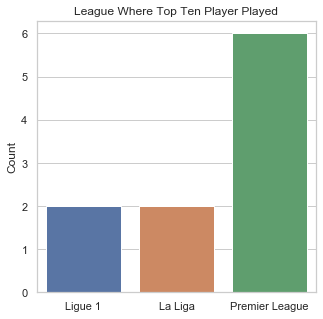

In [120]:
#Define plot object of top ten player
plt.figure(figsize=(5,5))

count = sns.countplot(top_ten_players['league'])

#Setting graph title
count.set_title('League Where Top Ten Player Played')
count.set(xlabel= '', ylabel = 'Count')
plt.xticks(rotation=0)

#Showing the plot
plt.show()

#### Notes:
1. The most expensive player mostly played in Premier League, England. while the rest played in Ligue 1, France and La Liga, Spain
2. The age are ranged from 19 to 31 years old
3. They are played for the club that categorized into top 20 of UEFA club coefficient
4. Most of them played as attacker and there is no goalkeeper in here
5. Most of them has big contribution towards the club during the competition, except Neymar since he had several severe injuries.

In [121]:
# examine the frequency, mean, st. deviation, min value, max value, and IQR of Player Characteristics' features
trainset[['age','height','weight','contract_expired','rating',\
         'club_mv','club_match_played', 'club_match_won', 'club_match_draw',
       'club_match_lose', 'club_total_goals', 'club_goals_conceded']].describe()

,age,height,weight,contract_expired,rating,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,club_total_goals,club_goals_conceded
count,3618.00,3583.00,3423.00,2719.00,3256.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00
mean,25.37,182.15,76.00,3.37,6.79,163811815.92,35.03,13.01,8.82,13.20,48.51,48.83
std,4.40,6.57,6.96,1.16,0.27,229459903.97,2.97,5.82,3.28,5.22,17.35,13.57
min,15.00,163.00,54.00,2.00,4.70,9830000.00,30.00,2.00,2.00,1.00,13.00,20.00
25%,22.00,178.00,71.00,2.07,6.64,29900000.00,34.00,9.00,7.00,9.00,36.00,39.00
50%,25.00,182.00,76.00,3.00,6.79,76000000.00,34.00,12.00,9.00,13.00,46.00,49.00
75%,28.00,187.00,80.00,4.00,6.94,181700000.00,38.00,16.00,11.00,17.00,58.00,57.00
max,40.00,204.00,103.00,10.00,8.80,1160000000.00,38.00,32.00,17.00,28.00,119.00,81.00


In [122]:
# examine the frequency, modes, and unique values of categorical variables in Player Characteristics
trainset[['nationality', 'club_name','position', 'dominant_foot',\
         'captain','league']].describe()

,nationality,club_name,position,dominant_foot,captain,league
count,3618,3618,3618,3577,3618,3618
unique,117,184,4,3,2,10
top,France,RSC Anderlecht,Midfielder,right,False,La Liga
freq,327,27,1272,2508,3179,404


In [220]:
# examine the frequency, mean, st. deviation, min value, max value, and IQR of Player Performance features
trainset[['shots_total', 'shots_on', 'goals_total',\
       'goals_conceded', 'goals_assists', 'passes_total', 'passes_key',\
       'passes_accuracy', 'tackles_total', 'tackles_blocks',\
       'tackles_interceptions', 'duels_total', 'duels_won',\
       'dribbles_attempts', 'dribbles_success']].describe()

,shots_total,shots_on,goals_total,goals_conceded,goals_assists,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success
count,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00
mean,15.41,5.26,1.76,1.81,1.11,419.63,11.54,66.43,14.13,3.79,13.84,132.89,66.76,17.35,9.88
std,21.15,8.44,3.25,8.28,1.93,431.67,15.69,24.50,16.26,6.10,16.70,127.80,64.60,25.89,14.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,59.00,0.00,64.00,1.00,0.00,1.00,15.00,8.00,1.00,0.00
50%,7.00,2.00,0.00,0.00,0.00,289.00,5.00,74.00,9.00,1.00,7.00,105.00,51.00,7.00,4.00
75%,21.00,7.00,2.00,0.00,1.00,650.00,17.00,80.00,22.00,5.00,22.00,220.00,110.00,24.00,13.00
max,177.00,83.00,36.00,80.00,17.00,2782.00,125.00,100.00,143.00,56.00,99.00,762.00,393.00,251.00,144.00


In [221]:
# examine the frequency, mean, st. deviation, min value, max value, and IQR of Player Performance features
trainset[['fouls_drawn','fouls_committed', 'cards_yellow', 'cards_yellowred', 'cards_red',\
       'penalty_won', 'penalty_success', 'penalty_missed', 'penalty_saved',\
       'games_appearences', 'games_minutes_played', 'games_lineups',\
       'substitutes_in', 'substitutes_out', 'substitutes_bench']].describe()

,fouls_drawn,fouls_committed,cards_yellow,cards_yellowred,cards_red,penalty_won,penalty_success,penalty_missed,penalty_saved,games_appearences,games_minutes_played,games_lineups,substitutes_in,substitutes_out,substitutes_bench
count,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00
mean,14.71,15.50,2.72,0.07,0.07,0.15,0.15,0.04,0.03,18.58,1332.21,14.84,3.73,3.72,9.53
std,16.82,15.63,2.71,0.28,0.28,0.47,0.68,0.24,0.25,11.02,975.30,11.17,4.13,4.17,8.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00,446.00,4.00,1.00,0.00,3.00
50%,9.00,12.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,1215.00,14.00,2.00,2.00,8.00
75%,22.00,25.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,28.00,2129.75,24.00,6.00,6.00,14.00
max,112.00,98.00,16.00,2.00,3.00,5.00,11.00,4.00,3.00,40.00,3600.00,40.00,25.00,24.00,38.00


In [124]:
# examine the frequency, mean, st. deviation, min value, max value, and IQR of Player Popularity features
trainset[['google_search', 'twitter_avgretweets', 'twitter_avglikes',\
       'youtube_avgview', 'youtube_avglike', 'youtube_avgdislike',\
       'youtube_avgcomment']].describe()

,google_search,twitter_avgretweets,twitter_avglikes,youtube_avgview,youtube_avglike,youtube_avgdislike,youtube_avgcomment
count,3434.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00
mean,981577.19,6.84,64.58,125645.00,1822.60,64.60,109.30
std,4805351.48,63.31,533.32,746028.48,8329.97,372.21,445.43
min,651.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,42225.00,0.00,0.00,219.35,2.00,0.00,0.00
50%,111000.00,0.00,0.00,2599.30,45.29,1.40,4.45
75%,409750.00,0.00,0.00,22234.62,322.45,11.60,36.00
max,115000000.00,1825.07,12209.50,22312825.20,146385.80,9306.00,9620.40


## 2.2 Univariate Graphical 

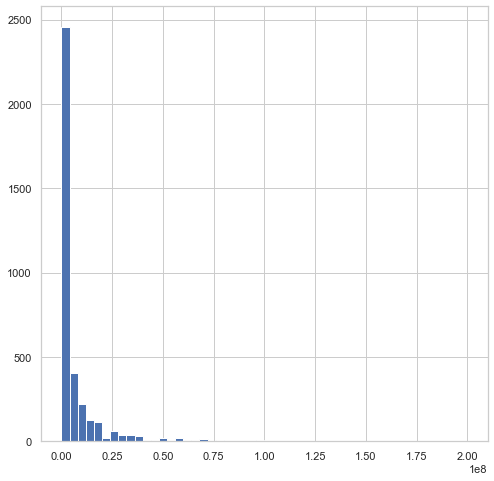

In [125]:
# check the distribution of market_value with histogram
hist = trainset['market_value'].hist(bins=50, figsize=(8,8))

**Notes:**
1. The market value is left-skewed.
2. It will be log transformed later in the data preparation.

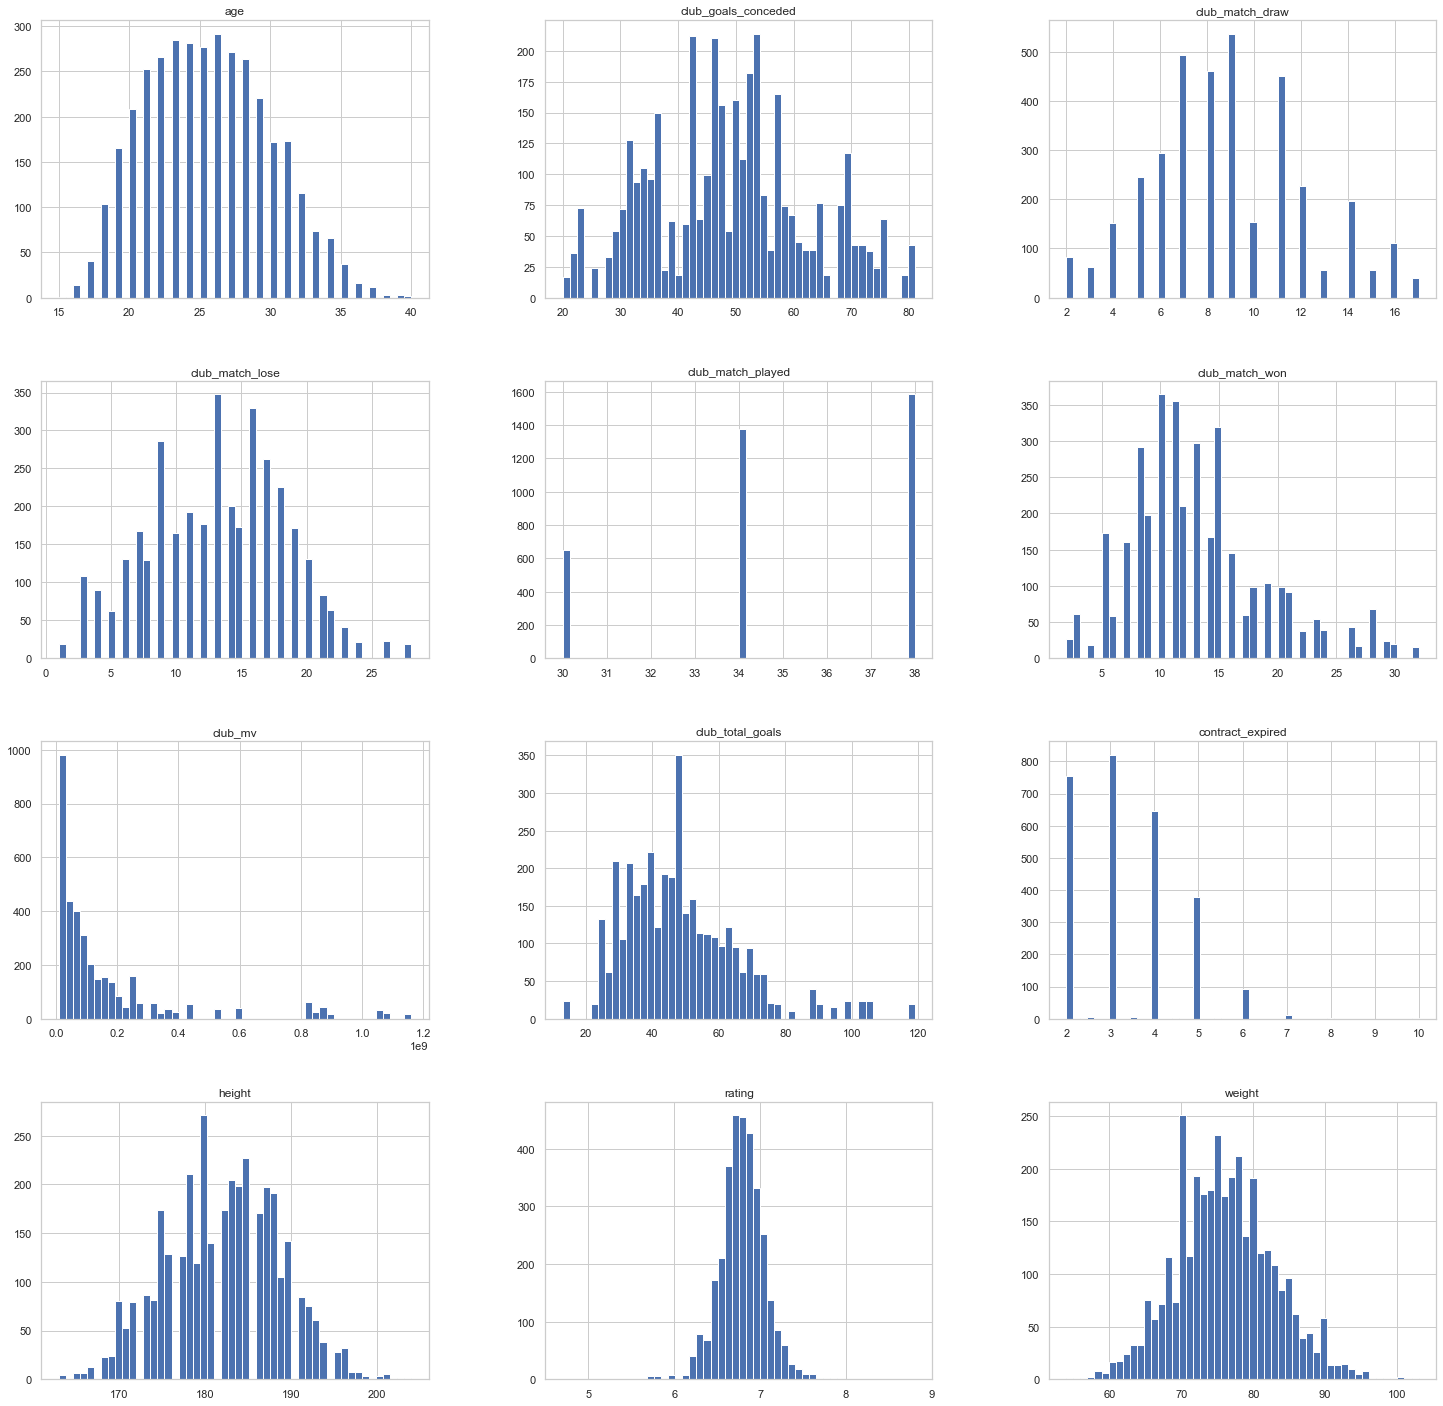

In [126]:
# check the distribution of Player Characteristics with histogram
hist = trainset[['age','height','weight','contract_expired','rating',\
         'club_mv','club_match_played', 'club_match_won', 'club_match_draw',
       'club_match_lose', 'club_total_goals', 'club_goals_conceded']].hist(bins=50, figsize=(25,25))

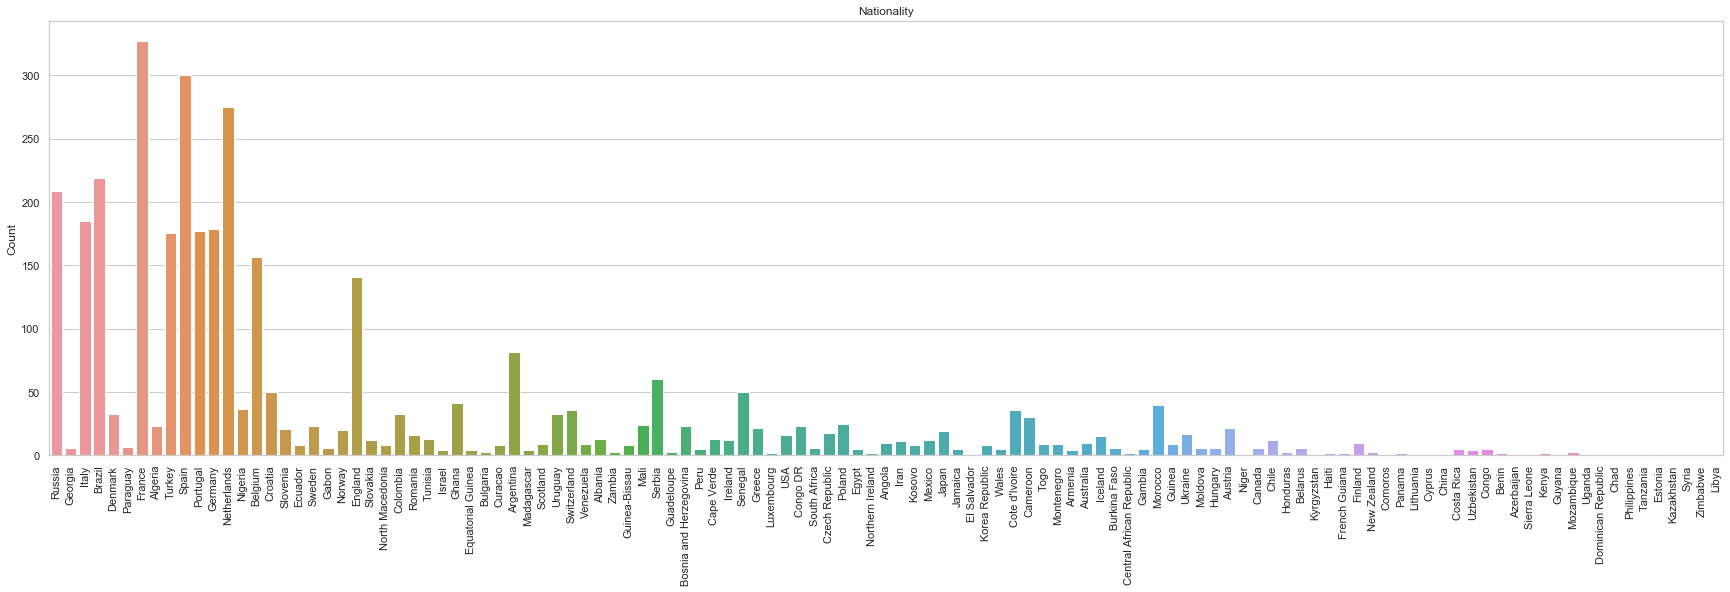

In [127]:
# check the distribution of Player Characteristics' categorical variable with histogram

plt.figure(figsize=(30,8))
count = sns.countplot(trainset['nationality'])
count.set_title('Nationality')
count.set(xlabel = '', ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

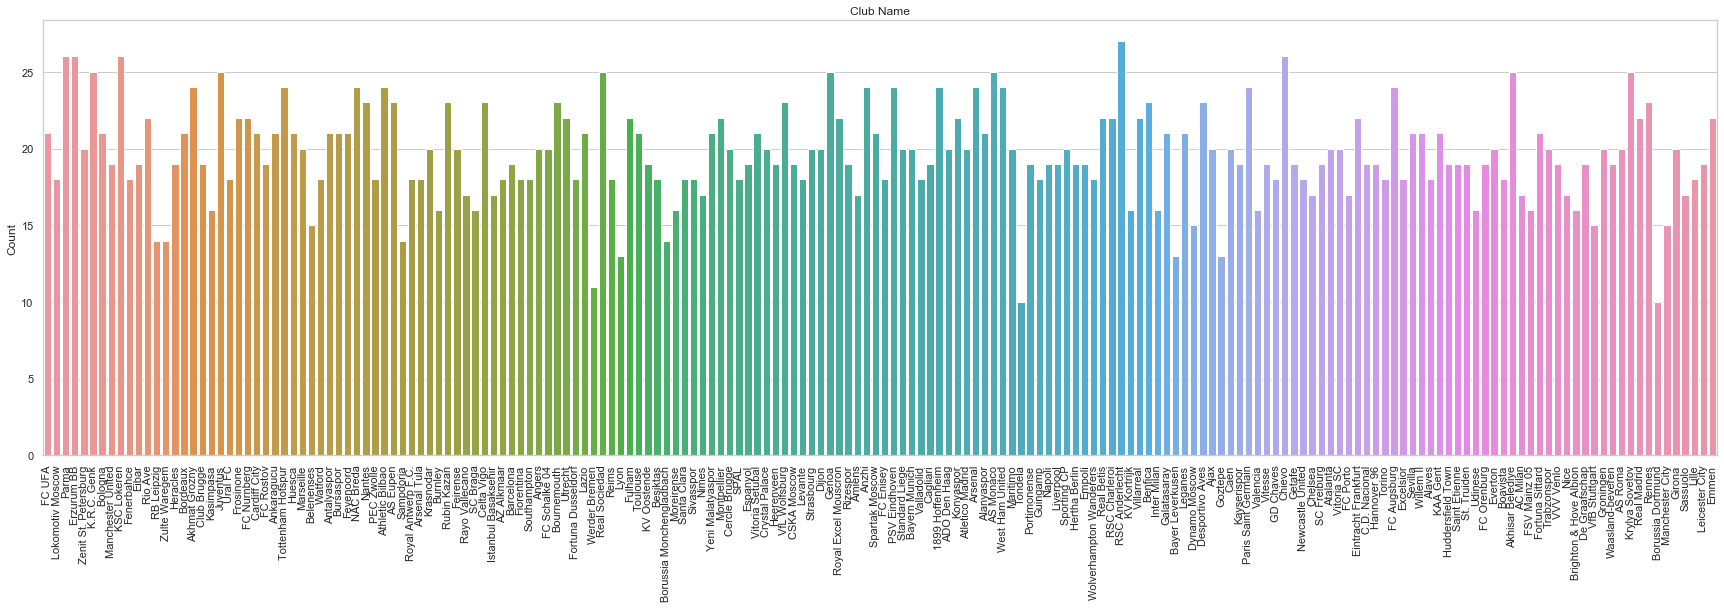

In [128]:
# check the distribution of Player Characteristics' categorical variable with histogram

plt.figure(figsize=(30,8))
count = sns.countplot(trainset['club_name'])
count.set_title('Club Name')
count.set(xlabel = '', ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

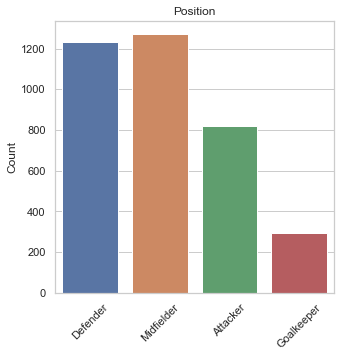

In [129]:
# check the distribution of Player Characteristics' categorical variable with histogram

plt.figure(figsize=(5,5))
count = sns.countplot(trainset['position'])
count.set_title('Position')
count.set(xlabel = '', ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

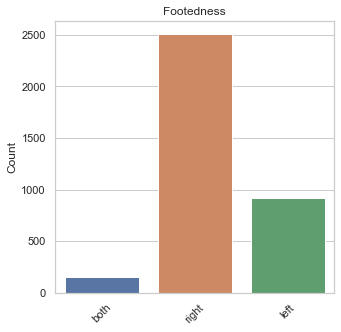

In [130]:
# check the distribution of Player Characteristics' categorical variable with histogram

plt.figure(figsize=(5,5))
count = sns.countplot(trainset['dominant_foot'])
count.set_title('Footedness')
count.set(xlabel = '', ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

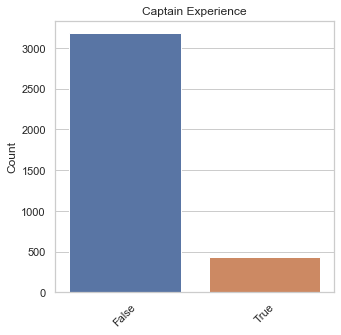

In [131]:
# check the distribution of Player Characteristics' categorical variable with histogram

plt.figure(figsize=(5,5))
count = sns.countplot(trainset['captain'])
count.set_title('Captain Experience')
count.set(xlabel = '', ylabel = 'Count')
plt.xticks(rotation=45)
plt.show()

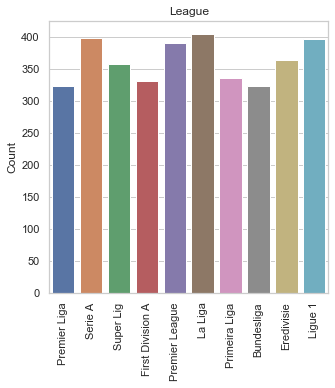

In [132]:
# check the distribution of Player Characteristics' categorical variable with histogram

plt.figure(figsize=(5,5))
count = sns.countplot(trainset['league'])
count.set_title('League')
count.set(xlabel = '', ylabel = 'Count')
plt.xticks(rotation=90)
plt.show()

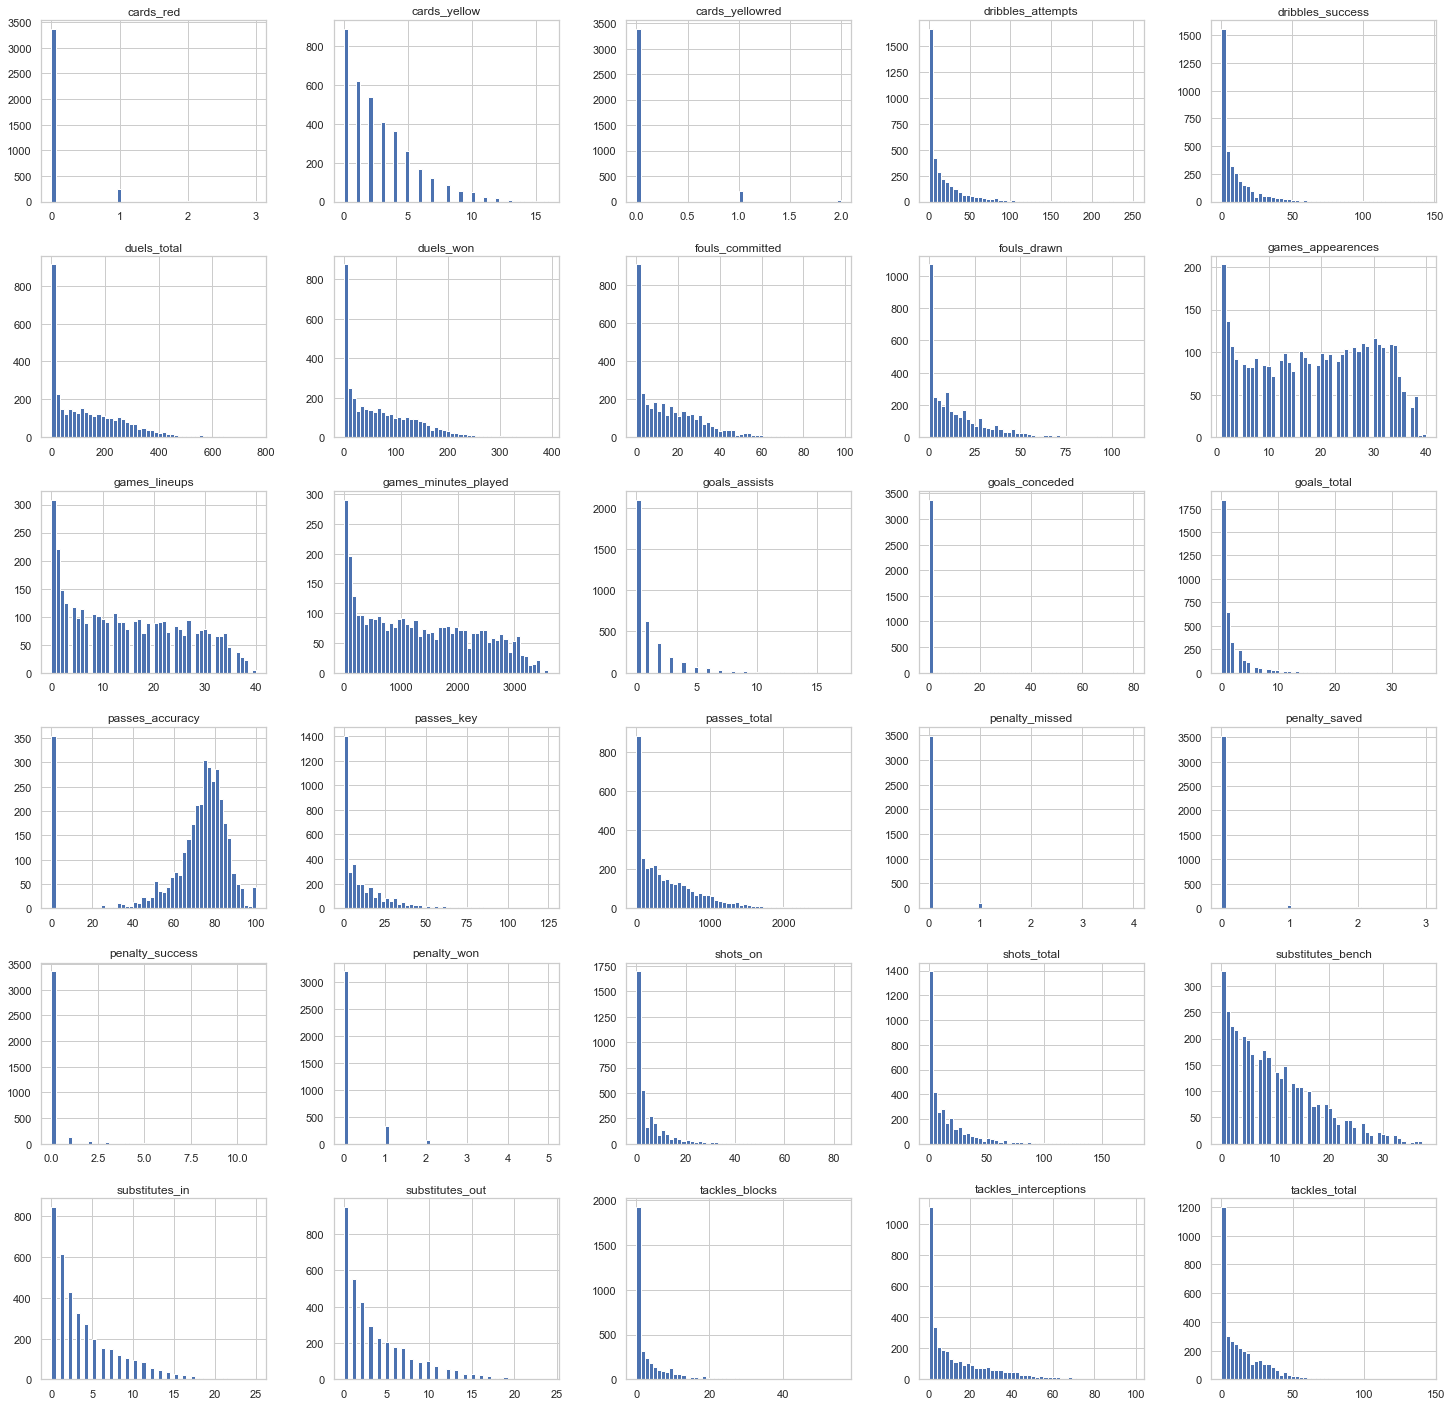

In [133]:
# check the distribution of Player Performance variable with histogram

hist = trainset[['shots_total', 'shots_on', 'goals_total',\
       'goals_conceded', 'goals_assists', 'passes_total', 'passes_key',\
       'passes_accuracy', 'tackles_total', 'tackles_blocks',\
       'tackles_interceptions', 'duels_total', 'duels_won',\
       'dribbles_attempts', 'dribbles_success', 'fouls_drawn',\
       'fouls_committed', 'cards_yellow', 'cards_yellowred', 'cards_red',\
       'penalty_won', 'penalty_success', 'penalty_missed', 'penalty_saved',\
       'games_appearences', 'games_minutes_played', 'games_lineups',\
       'substitutes_in', 'substitutes_out', 'substitutes_bench']].hist(bins=50, figsize=(25,25))

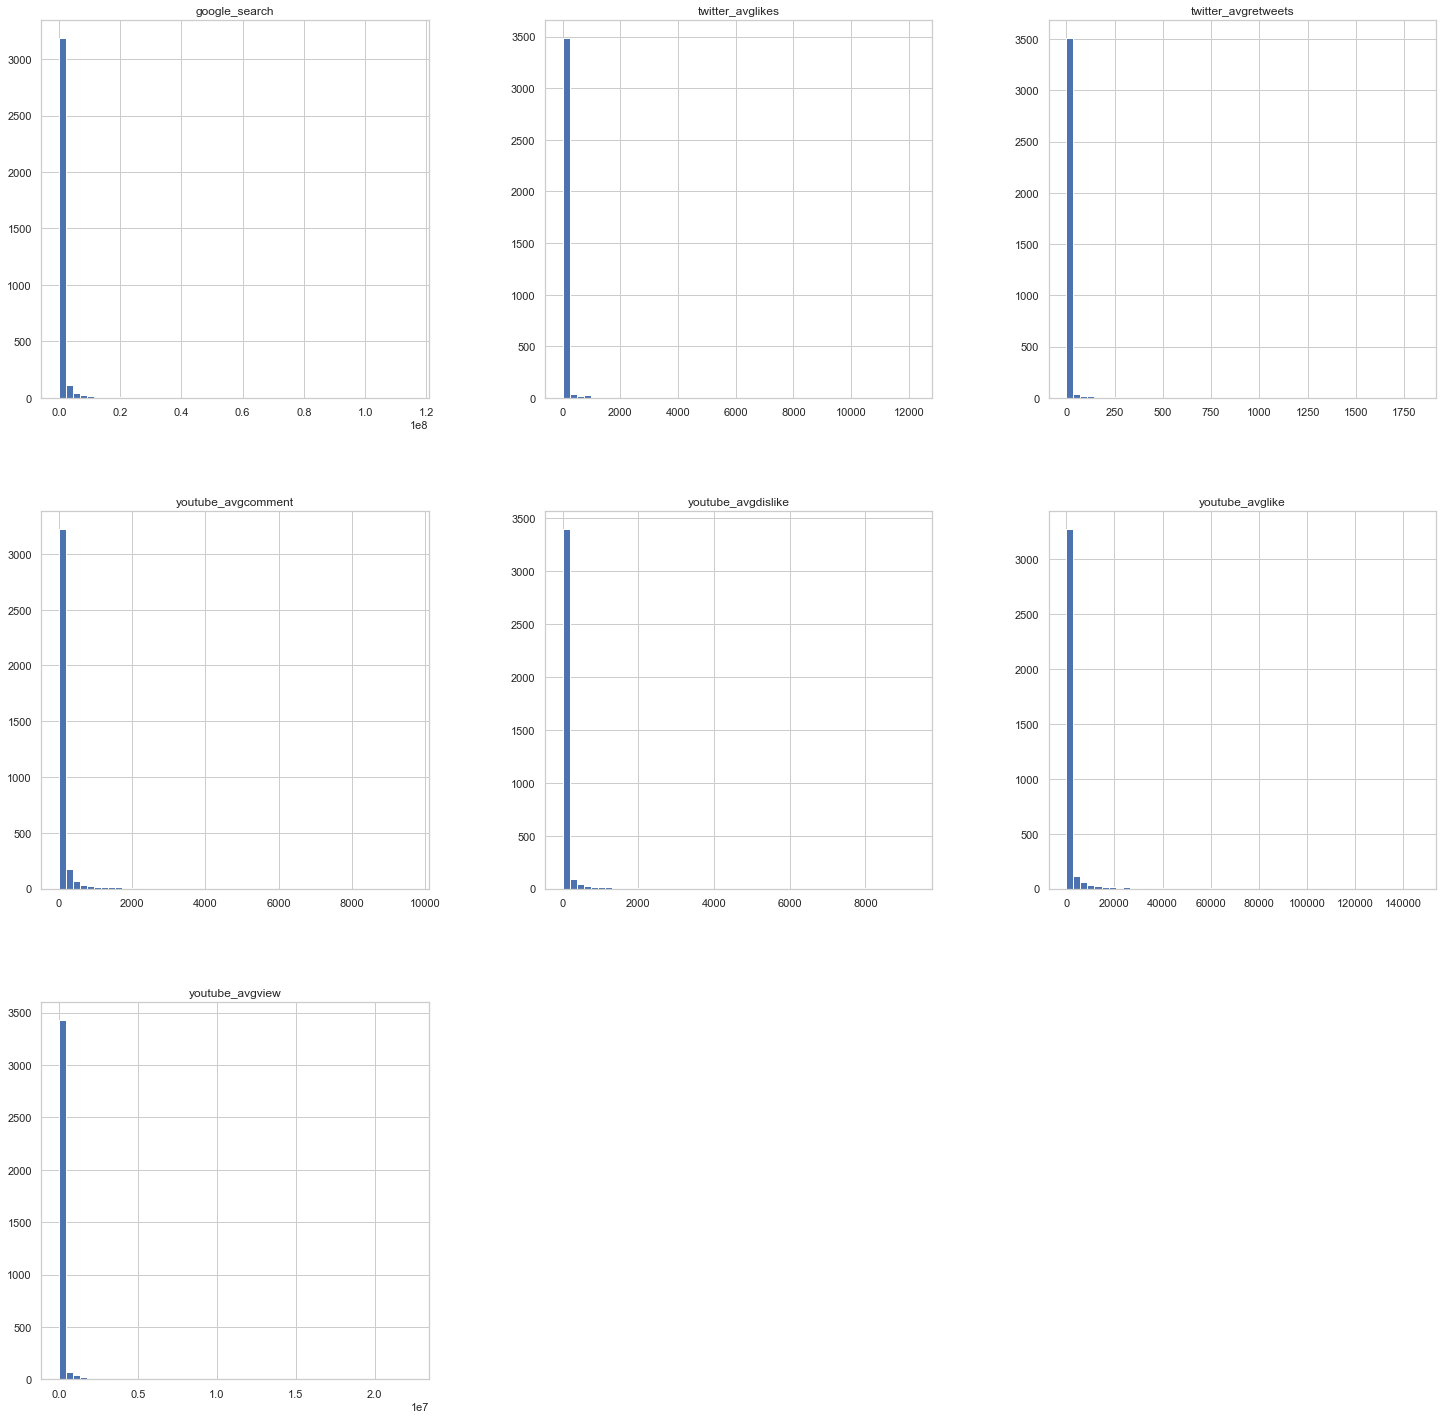

In [134]:
# check the distribution of Player Popularity variable with histogram

hist = trainset[['google_search', 'twitter_avgretweets', 'twitter_avglikes',\
       'youtube_avgview', 'youtube_avglike', 'youtube_avgdislike',\
       'youtube_avgcomment']].hist(bins=50, figsize=(25,25))

## 2.3 Multivariate Non-Graphical 

### 2.3.1 Groupby to expose information that exists between the interaction of variables

#### 1. How many players in each league?

In [135]:
df.groupby('league')['player_name'].nunique()

league
Bundesliga          399
Eredivisie          451
First Division A    418
La Liga             506
Ligue 1             496
Premier League      481
Premier Liga        407
Primeira Liga       415
Serie A             520
Super Lig           421
Name: player_name, dtype: int64

#### 2. What is the average height in each position?

In [136]:
height_per_position = trainset.groupby(['position'], as_index=False)['height'].mean()
print (height_per_position)

     position  height
0    Attacker  181.68
1    Defender  183.29
2  Goalkeeper  189.80
3  Midfielder  179.54


#### 3. What is the average mins played in every group of age?

In [137]:
# binned the age into five group
bins = [14.5, 20.5, 25.5, 30.5, 35.5, 40.5]
trainset['binned_age'] = pd.cut(trainset['age'], bins, labels=["14-20", "20-25", "25-30","30-35","35-40"])
trainset['binned_age'].unique

# groupby and take the average of mins played on binned age
minsplayed_per_agegroup = trainset.groupby(['binned_age'],as_index=False)['games_minutes_played'].mean()
minsplayed_per_agegroup 

,binned_age,games_minutes_played
0,14-20,722.46
1,20-25,1360.29
2,25-30,1511.66
3,30-35,1471.08
4,35-40,1414.03


#### 4. What is the average Google Search for the player per league?

In [138]:
# groupby and take the average of mins played on binned age
googlesearch_per_league = trainset.groupby(['league'],as_index=False)['google_search'].mean()
googlesearch_per_league

,league,google_search
0,Bundesliga,368552.63
1,Eredivisie,155539.88
2,First Division A,77662.47
3,La Liga,2692785.01
4,Ligue 1,756753.67
5,Premier League,1896318.31
6,Premier Liga,50943.47
7,Primeira Liga,2082727.05
8,Serie A,1082829.37
9,Super Lig,212454.33


#### 5. Top five players based on the market value in each position

In [139]:
# Defender
defender=df.loc[df['position']=='Defender']

# the average price of defender
print('The average defender price is' + " "+ "€"+str(defender['market_value'].mean()))

# top five of defender with highest market value
highest_def = defender.sort_values(by=['market_value'],ascending=False)
highest_def = highest_def.head(5)
highest_def[['player_name','age','club_name','market_value']]

The average defender price is €5821463.494132985


,player_name,age,club_name,market_value
464,virgil van dijk,26,Liverpool,90000000.00
467,trent alexander-arnold,19,Liverpool,80000000.00
2292,kalidou koulibaly,27,Napoli,75000000.00
2753,matthijs de ligt,18,Ajax,75000000.00
419,aymeric laporte,24,Manchester City,75000000.00


In [140]:
# Midfielder
midfielder=df.loc[df['position']=='Midfielder']

# the average price of midfielder
print('The average midfielder price is' + " "+ "€"+str(midfielder['market_value'].mean()))

# top five of defender with highest market value
highest_mid = midfielder.sort_values(by=['market_value'],ascending=False)
highest_mid = highest_mid.head(5)
highest_mid[['player_name','age','club_name','market_value']]

The average midfielder price is €7420393.081761006


,player_name,age,club_name,market_value
426,kevin de bruyne,27,Manchester City,130000000.00
519,christian eriksen,26,Tottenham Hotspur,100000000.00
428,bernardo silva,23,Manchester City,100000000.00
502,paul pogba,25,Manchester United,100000000.00
445,n'golo kante,27,Chelsea,100000000.00


In [141]:
# Attacker
attacker=df.loc[df['position']=='Attacker']

# the average price of attacker
print('The average attacker price is' + " "+ "€"+str(attacker['market_value'].mean()))

# top five of attacker with highest market value
highest_att = attacker.sort_values(by=['market_value'],ascending=False)
highest_att = highest_att.head(5)
highest_att[['player_name','age','club_name','market_value']]

The average attacker price is €8699759.1522158


,player_name,age,club_name,market_value
909,kylian mbappe,19,Paris Saint Germain,200000000.00
908,neymar,26,Paris Saint Germain,180000000.00
4049,lionel messi,31,Barcelona,150000000.00
448,eden hazard,27,Chelsea,150000000.00
473,mohamed salah,26,Liverpool,150000000.00


In [142]:
# Goalkeeper
gk=df.loc[df['position']=='Goalkeeper']

# the average price of goalkeeper
print('The average goalkeeper price is' + " "+ "€"+str(gk['market_value'].mean()))

# top five of attacker with highest market value
highest_gk = gk.sort_values(by=['market_value'],ascending=False)
highest_gk = highest_gk.head(5)
highest_gk[['player_name','age','club_name','market_value']]

The average goalkeeper price is €5184487.534626039


,player_name,age,club_name,market_value
4069,jan oblak,25,Atletico Madrid,100000000.00
4040,marc-andre ter stegen,26,Barcelona,90000000.00
463,alisson,25,Liverpool,80000000.00
418,ederson,24,Manchester City,70000000.00
484,david de gea,27,Manchester United,65000000.00


### 2.3.2 Correlation

In [143]:
# correlation between dependent variable and numeric independent variables
numeric=trainset.drop(['player_name', 'nationality','club_name',
                   'league','position','dominant_foot','captain'], axis=1)
corr_matrix = numeric.corr()
corr_matrix['market_value'].sort_values(ascending=False)

market_value             1.00
youtube_avglike          0.63
club_mv                  0.62
youtube_avgview          0.59
youtube_avgcomment       0.54
youtube_avgdislike       0.53
club_match_won           0.46
shots_on                 0.45
shots_total              0.43
goals_total              0.43
passes_total             0.42
dribbles_success         0.41
club_total_goals         0.41
rating                   0.40
dribbles_attempts        0.40
passes_key               0.39
goals_assists            0.39
contract_expired         0.36
games_appearences        0.34
games_minutes_played     0.33
games_lineups            0.33
duels_total              0.33
duels_won                0.32
twitter_avgretweets      0.31
twitter_avglikes         0.30
google_search            0.29
fouls_drawn              0.29
club_match_played        0.28
tackles_total            0.26
penalty_won              0.24
penalty_success          0.23
fouls_committed          0.22
substitutes_out          0.20
passes_acc

In [219]:
# correlation between dependent variable and categorical independent variables

# make new column 'binned_mv', a categorical version of market_value
trainset["binned_mv"] = pd.qcut(trainset['market_value'], q=4)

# create a crosstab for performing chi-square test for trainset
position = pd.crosstab(trainset['position'], trainset['binned_mv'])
foot = pd.crosstab(trainset['dominant_foot'], trainset['binned_mv'])
# nationality = pd.crosstab(trainset['nationality'], trainset['binned_mv'])
# club_name = pd.crosstab(trainset['club_name'], trainset['binned_mv'])
captain = pd.crosstab(trainset['captain'], trainset['binned_mv'])
# league = pd.crosstab(trainset['league'], trainset['binned_mv'])


#Chi-square for trainset for the categorical variables with the target categorical one
from scipy import stats

chi2, p_val, dof, expected = stats.chi2_contingency(position)
print(f"p-value of position: {p_val}")
chi2, p_val, dof, expected = stats.chi2_contingency(foot)
print(f"p-value of footedness: {p_val}")
# chi2, p_val, dof, expected = stats.chi2_contingency(nationality)
# print(f"p-value of nationality: {p_val}")
# chi2, p_val, dof, expected = stats.chi2_contingency(club_name)
# print(f"p-value of club name: {p_val}")
chi2, p_val, dof, expected = stats.chi2_contingency(captain)
print(f"p-value of captain: {p_val}")
# chi2, p_val, dof, expected = stats.chi2_contingency(league)
# print(f"p-value of league: {p_val}")

p-value of position: 9.833308388244997e-05
p-value of footedness: 0.040037570545673286
p-value of captain: 0.018552809416052047


**Notes:**

1. position: the p-value is smaller than 0.05, which means that we reject the Ho. There is evidence that the position of the player has an influence towards the market value.
2. foot: the p-value is smaller than 0.05, then dominant foot of the player has impact towards the market value.  
3. captain experience: the p-value is smaller than 0.05, then the captain experience of the player has impact towards the market value. 

## 2.4 Multivariate Graphical 

### 2.4.1 Scatterplot between Market Value and Player Characteristics

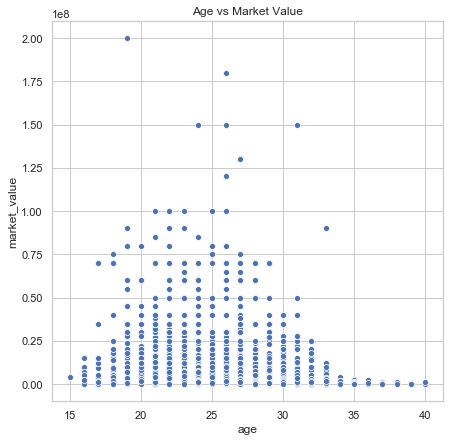

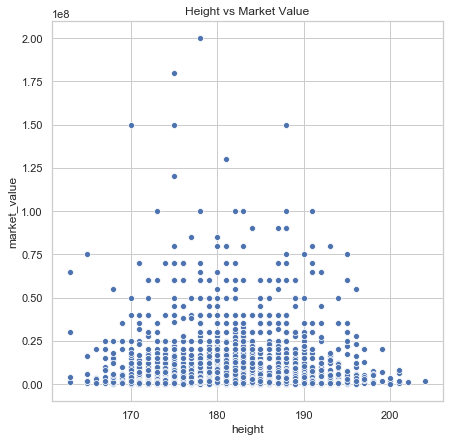

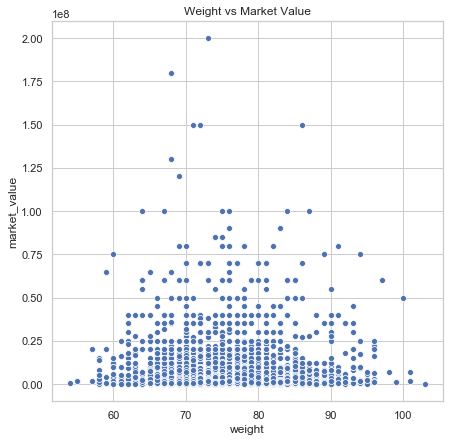

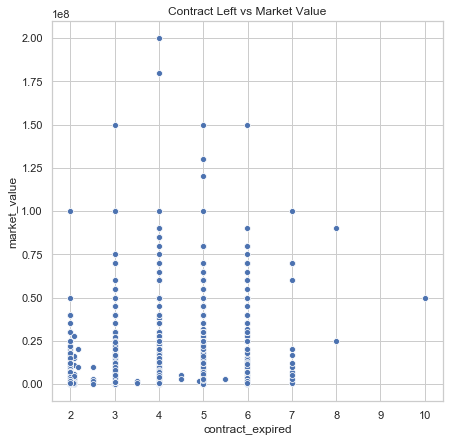

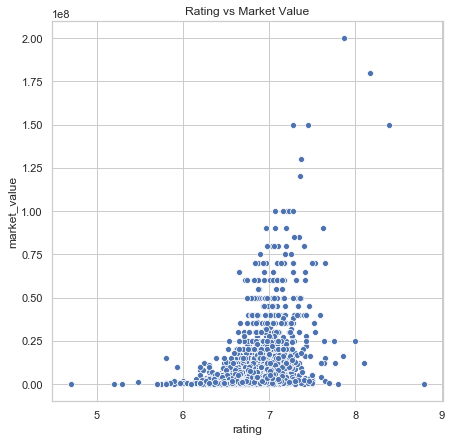

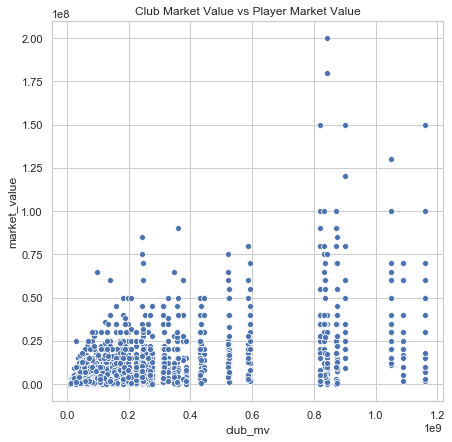

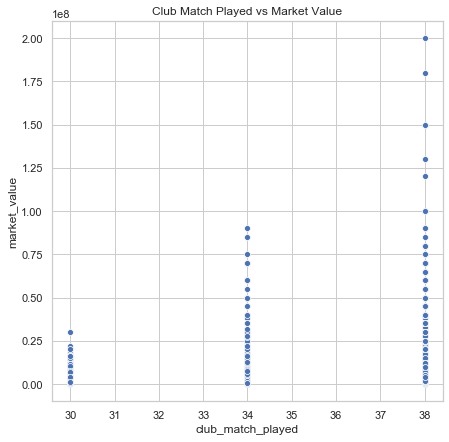

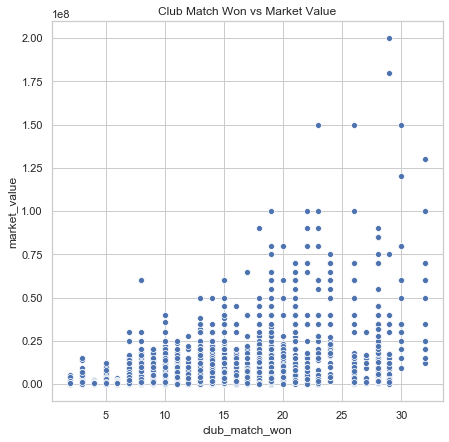

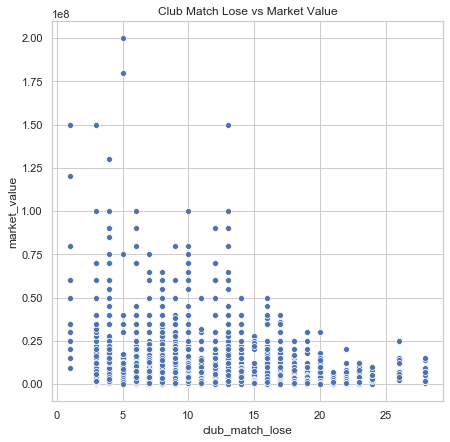

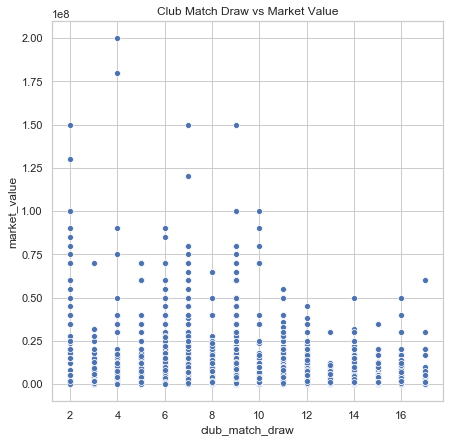

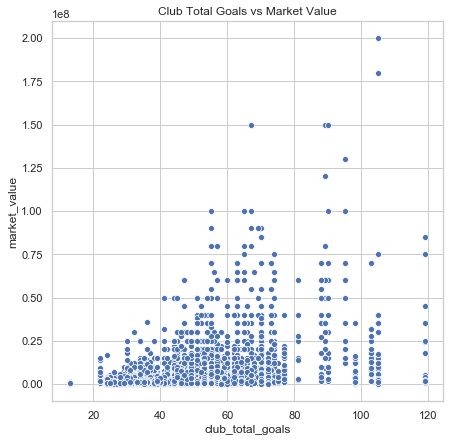

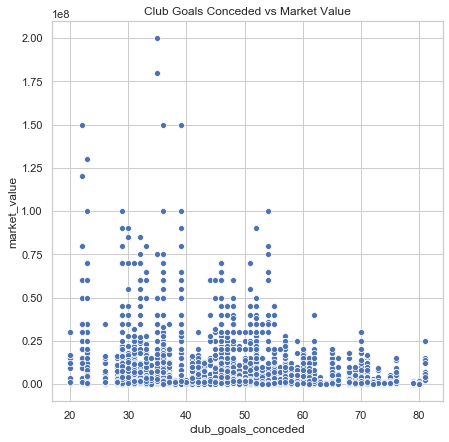

In [145]:
# Age and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['age'], trainset['market_value'])
#Setting graph title
scatter.set_title('Age vs Market Value')
#Showing the plot
plt.show()

# Height and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['height'], trainset['market_value'])
#Setting graph title
scatter.set_title('Height vs Market Value')
#Showing the plot
plt.show()

# Weight and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['weight'], trainset['market_value'])
#Setting graph title
scatter.set_title('Weight vs Market Value')
#Showing the plot
plt.show()

# Contract Left and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['contract_expired'], trainset['market_value'])
#Setting graph title
scatter.set_title('Contract Left vs Market Value')
#Showing the plot
plt.show()

# Rating vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['rating'], trainset['market_value'])
#Setting graph title
scatter.set_title('Rating vs Market Value')
#Showing the plot
plt.show()

# Club Market Value vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_mv'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Market Value vs Player Market Value')
#Showing the plot
plt.show()

# Club Match Played vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_match_played'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Match Played vs Market Value')
#Showing the plot
plt.show()

# Club Match Won vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_match_won'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Match Won vs Market Value')
#Showing the plot
plt.show()

# Club Match Lose vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_match_lose'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Match Lose vs Market Value')
#Showing the plot
plt.show()

# Club Match Draw vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_match_draw'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Match Draw vs Market Value')
#Showing the plot
plt.show()

# Club Total Goals vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_total_goals'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Total Goals vs Market Value')
#Showing the plot
plt.show()

# Club Goals Conceded vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_goals_conceded'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Goals Conceded vs Market Value')
#Showing the plot
plt.show()


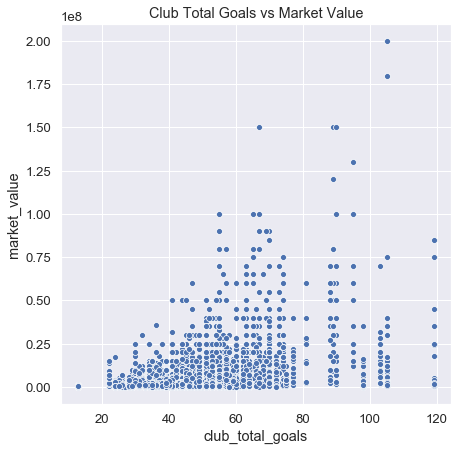

In [222]:
os.chdir('C:/Users/Cynthia Suprihanta/OneDrive/Aston University/Business Project/write/appendix')
### RUN ONE BY ONE

# # Age and Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['age'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Age vs Market Value')
# #Saving plot into png
# plt.savefig('Age vs Market Value.png')

# # Height and Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['height'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Height vs Market Value')
# #Saving plot into png
# plt.savefig('Height vs Market Value.png')

# # Weight and Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['weight'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Weight vs Market Value')
# #Saving plot into png
# plt.savefig('Weight vs Market Value.png')

# # Contract Left and Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['contract_expired'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Contract Left vs Market Value')
# #Saving plot into png
# plt.savefig('Contract Left vs Market Value.png')

# # Rating vs Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['rating'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Rating vs Market Value')
# #Saving plot into png
# plt.savefig('Rating vs Market Value.png')

# # Club Market Value vs Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['club_mv'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Club Market Value vs Player Market Value')
# #Saving plot into png
# plt.savefig('Club Market Value vs Market Value.png')

# # Club Match Played vs Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['club_match_played'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Club Match Played vs Market Value')
# #Saving plot into png
# plt.savefig('Club Match Played vs Market Value.png')

# # Club Match Won vs Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['club_match_won'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Club Match Won vs Market Value')
# #Saving plot into png
# plt.savefig('Club Match Won vs Market Value.png')

# # Club Match Lose vs Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['club_match_lose'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Club Match Lose vs Market Value')
# #Saving plot into png
# plt.savefig('Club Match Lose vs Market Value.png')

# # Club Match Draw vs Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['club_match_draw'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Club Match Draw vs Market Value')
# #Saving plot into png
# plt.savefig('Club Match Draw vs Market Value.png')

# Club Total Goals vs Market Value

#Define plot object
scatter = sns.scatterplot(trainset['club_total_goals'], trainset['market_value'])
#Setting graph title
scatter.set_title('Club Total Goals vs Market Value')
#Saving plot into png
plt.savefig('Club Total Goals vs Market Value.png')

# # Club Goals Conceded vs Market Value

# #Define plot object
# scatter = sns.scatterplot(trainset['club_goals_conceded'], trainset['market_value'])
# #Setting graph title
# scatter.set_title('Club Goals Conceded vs Market Value')
# #Saving plot into png
# plt.savefig('Club Goals Conceded vs Market Value.png')


### 2.4.2 Box-and-Whisker Plots between Market Value and Player Characteristics

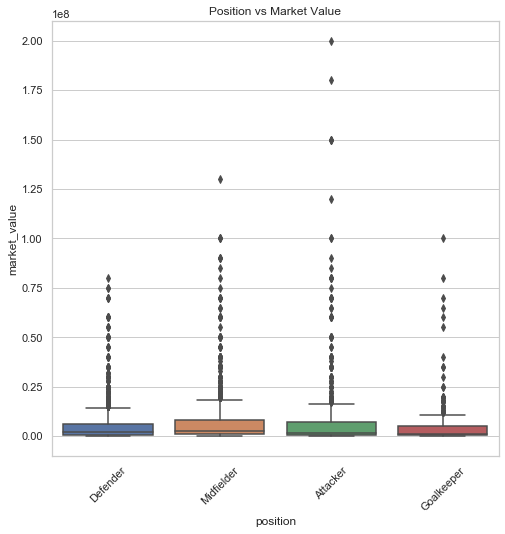

In [148]:
# Position

plt.figure(figsize=(8,8))
boxplot = sns.boxplot(x='position', y='market_value', data=trainset)
boxplot.set_title('Position vs Market Value')
count.set(xlabel = '', ylabel = 'Market Value')
plt.xticks(rotation=45)
plt.savefig('Position vs Market Value.png')
plt.show()

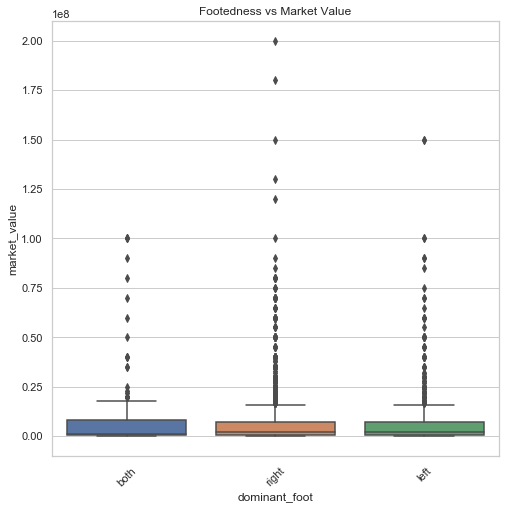

In [149]:
# Footednes

plt.figure(figsize=(8,8))
boxplot = sns.boxplot(x='dominant_foot', y='market_value', data=trainset)
boxplot.set_title('Footedness vs Market Value')
count.set(xlabel = '', ylabel = 'Market Value')
plt.xticks(rotation=45)
plt.savefig('Footedness vs Market Value.png')
plt.show()

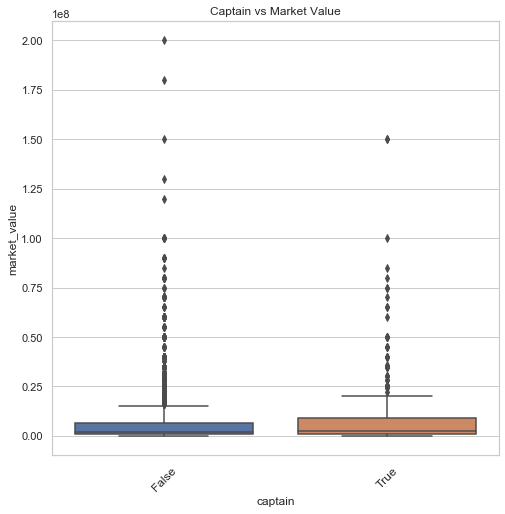

In [150]:
# Captain Experience

plt.figure(figsize=(8,8))
boxplot = sns.boxplot(x='captain', y='market_value', data=trainset)
boxplot.set_title('Captain vs Market Value')
count.set(xlabel = '', ylabel = 'Market Value')
plt.xticks(rotation=45,fontsize=12)
plt.savefig('Captain vs Market Value.png')
plt.show()

### 2.4.3 Scatterplot between Market Value and Player Performance

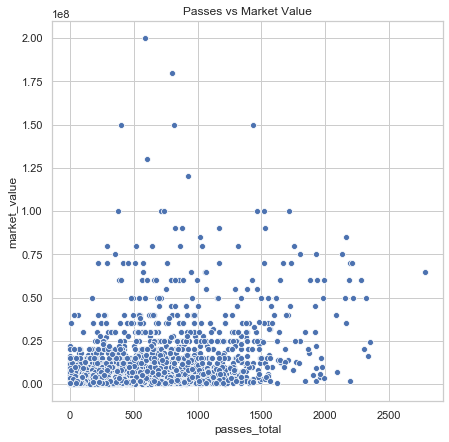

In [161]:
### RUN ONE BY ONE

# Shots and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['shots_total'], trainset['market_value'])
#Setting graph title
scatter.set_title('Shots vs Market Value')
#Saving plot into png
plt.savefig('Shots vs Market Value.png')
#Showing the plot
plt.show()

# Goals and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['goals_total'], trainset['market_value'])
#Setting graph title
scatter.set_title('Goals vs Market Value')
#Saving plot into png
plt.savefig('Goals vs Market Value.png')
#Showing the plot
plt.show()

# Assists and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['goals_assists'], trainset['market_value'])
#Setting graph title
scatter.set_title('Assists vs Market Value')
#Saving plot into png
plt.savefig('Assists vs Market Value.png')
#Showing the plot
plt.show()

# Passes and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['passes_total'], trainset['market_value'])
#Setting graph title
scatter.set_title('Passes vs Market Value')
#Saving plot into png
plt.savefig('Passes vs Market Value.png')
#Showing the plot
plt.show()

# Games Appearance and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['games_appearences'], trainset['market_value'])
#Setting graph title
scatter.set_title('Games Appearance vs Market Value')
#Saving plot into png
plt.savefig('Games Appearance vs Market Value.png')
#Showing the plot
plt.show()

# Minutes Played and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['games_minutes_played'], trainset['market_value'])
#Setting graph title
scatter.set_title('Minutes Played vs Market Value')
#Saving plot into png
plt.savefig('Minutes Played vs Market Value.png')
#Showing the plot
plt.show()

### 2.4.4 Scatterplot between Market Value and Player Popularity

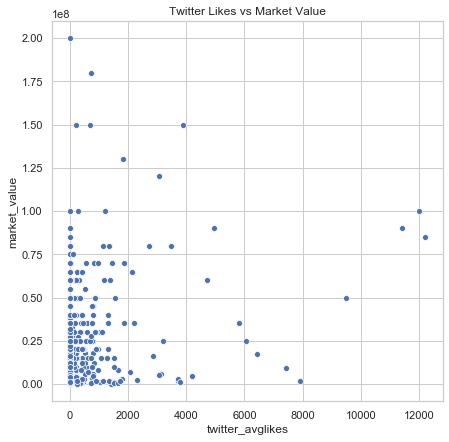

In [170]:
### RUN ONE BY ONE

# Google Search and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['google_search'], trainset['market_value'])
#Setting graph title
scatter.set_title('Google Search vs Market Value')
#Saving plot into png
plt.savefig('Google Search vs Market Value.png')
#Showing the plot
plt.show()

# Youtube Views and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['youtube_avgview'], trainset['market_value'])
#Setting graph title
scatter.set_title('Youtube View vs Market Value')
#Saving plot into png
plt.savefig('Youtube View vs Market Value.png')
#Showing the plot
plt.show()

# Youtube Likes and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['youtube_avglike'], trainset['market_value'])
#Setting graph title
scatter.set_title('Youtube Likes vs Market Value')
#Saving plot into png
plt.savefig('Youtube Likes vs Market Value.png')
#Showing the plot
plt.show()

# Youtube Dislikes and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['youtube_avgdislike'], trainset['market_value'])
#Setting graph title
scatter.set_title('Youtube Dislikes vs Market Value')
#Saving plot into png
plt.savefig('Youtube Dislikes vs Market Value.png')
#Showing the plot
plt.show()

# Youtube Comment and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['youtube_avgcomment'], trainset['market_value'])
#Setting graph title
scatter.set_title('Youtube Comment vs Market Value')
#Saving plot into png
plt.savefig('Youtube Comment vs Market Value.png')
#Showing the plot
plt.show()

# Twitter Retweet and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['twitter_avgretweets'], trainset['market_value'])
#Setting graph title
scatter.set_title('Twitter Retweet vs Market Value')
#Saving plot into png
plt.savefig('Twitter Retweet vs Market Value.png')
#Showing the plot
plt.show()

# Twitter Likes and Market Value

#Define plot object
scatter = sns.scatterplot(trainset['twitter_avglikes'], trainset['market_value'])
#Setting graph title
scatter.set_title('Twitter Likes vs Market Value')
#Saving plot into png
plt.savefig('Twitter Likes vs Market Value.png')
#Showing the plot
plt.show()

### 2.4.4 Heatmap to Visualize the Correlation

In [172]:
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)
from heatmap import heatmap, corrplot

In [173]:
corr_id= df[['market_value','age','height','weight','contract_expired','rating',\
             'club_mv','club_match_played', 'club_match_won', 'club_match_draw',\
             'club_match_lose', 'club_total_goals', 'club_goals_conceded'
            ]].copy()

corr_perf= df[['shots_total', 'shots_on', 'goals_total',\
               'goals_conceded', 'goals_assists', 'passes_total', 'passes_key',\
               'passes_accuracy', 'tackles_total', 'tackles_blocks',\
               'tackles_interceptions', 'duels_total', 'duels_won',\
               'dribbles_attempts', 'dribbles_success', 'fouls_drawn',\
               'fouls_committed', 'cards_yellow', 'cards_yellowred', 'cards_red',\
               'penalty_won', 'penalty_success', 'penalty_missed', 'penalty_saved',\
               'games_appearences', 'games_minutes_played', 'games_lineups',\
               'substitutes_in', 'substitutes_out', 'substitutes_bench'
               ]].copy()

corr_popularity=df[['market_value','google_search','twitter_avgretweets', 
                    'twitter_avglikes', 'youtube_avgview',
                    'youtube_avglike', 'youtube_avgdislike', 'youtube_avgcomment'
                   ]].copy()

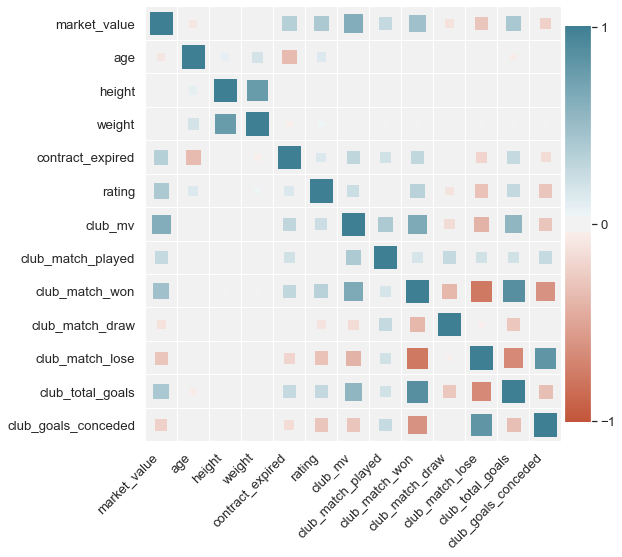

In [216]:
# heatmap id
plt.figure(figsize=(8, 8))
b=corrplot(corr_id.corr())
#Saving plot into png
plt.savefig('Correlation Player Characteristics.png',bbox_inches='tight')
#Showing the plot
plt.show()

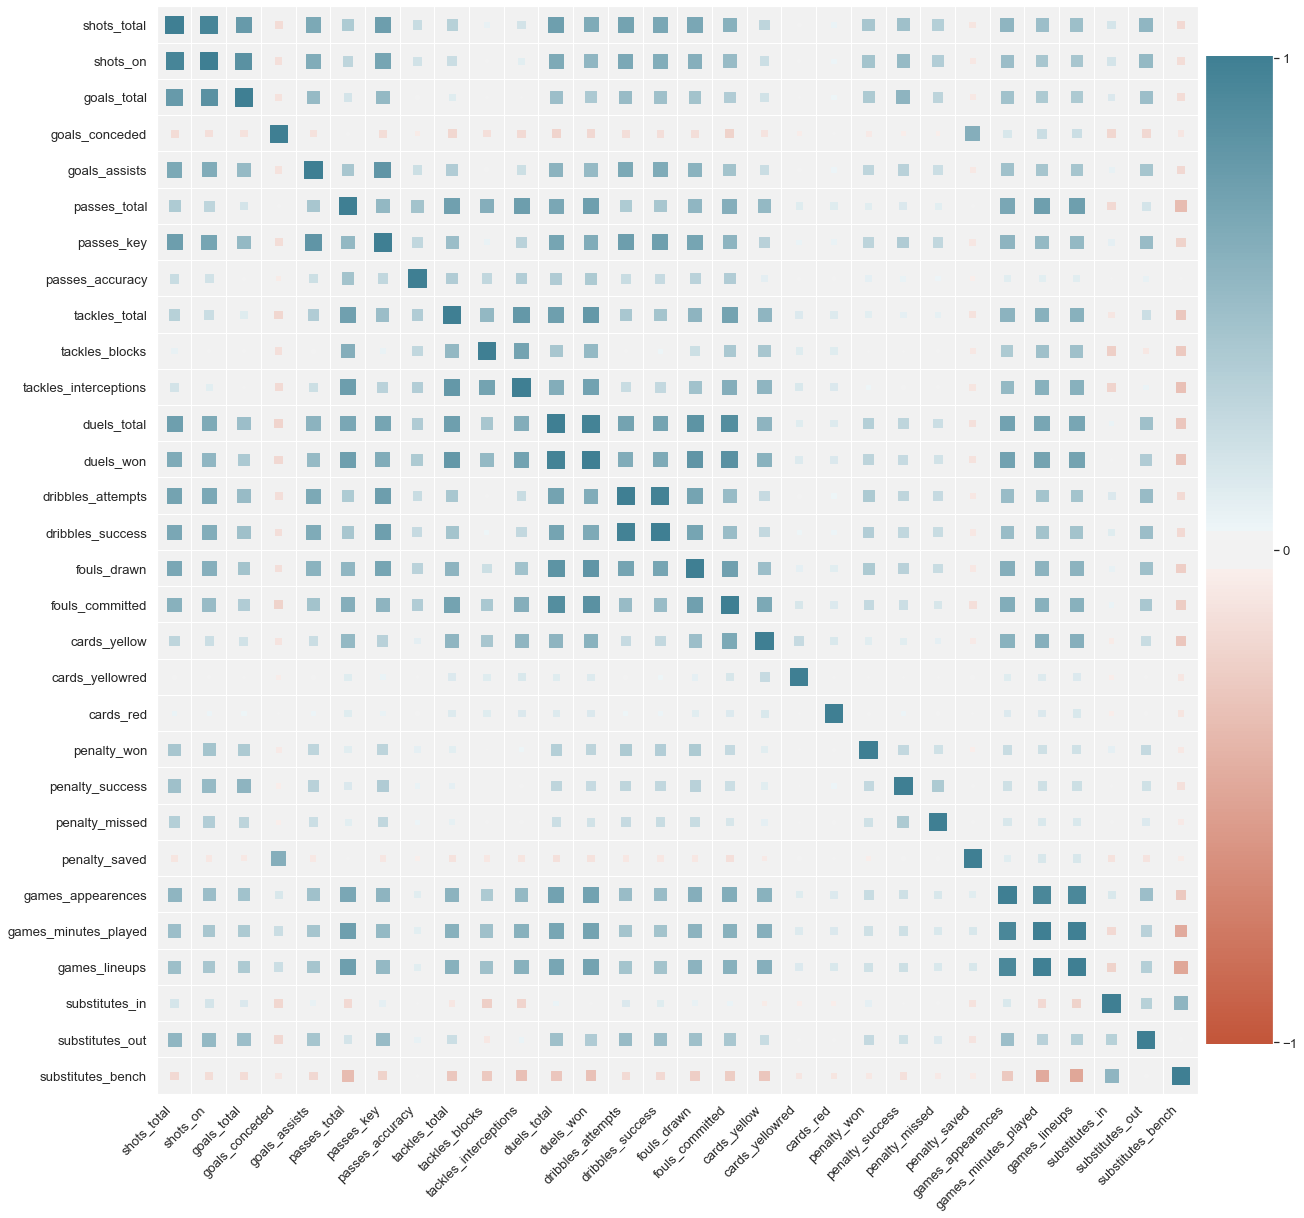

In [217]:
# heatmap performance
plt.figure(figsize=(20, 20))
corrplot(corr_perf.corr(), size_scale=300)
#Saving plot into png
plt.savefig('Correlation Player Performance.png',bbox_inches='tight')
#Showing the plot
plt.show()

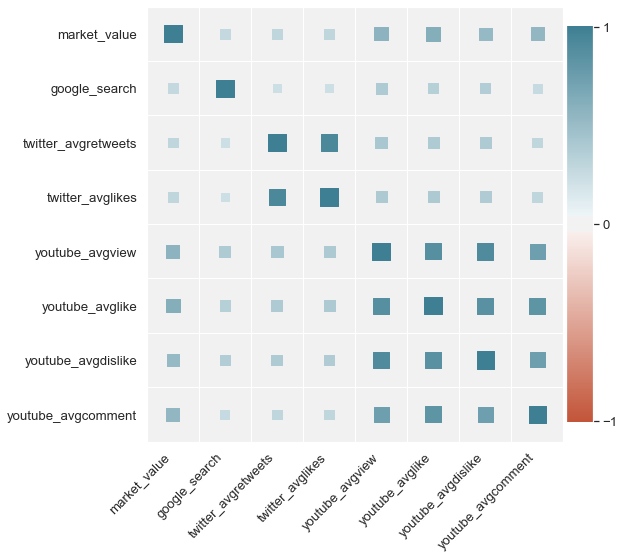

In [218]:
# heatmap popularity
plt.figure(figsize=(8, 8))
corrplot(corr_popularity.corr(), size_scale=300)
#Saving plot into png
plt.savefig('Correlation Player Popularity.png',bbox_inches='tight')
#Showing the plot
plt.show()

In [48]:
trainset = trainset.drop(['binned_age','binned_mv'], axis=1)

# 3. Data Preparation 

In [49]:
trainset.isna().sum()

market_value               0
player_name                0
age                        0
nationality                0
club_name                  0
club_mv                    0
club_match_played          0
club_match_won             0
club_match_draw            0
club_match_lose            0
club_total_goals           0
club_goals_conceded        0
league                     0
contract_expired         899
position                   0
dominant_foot             41
height                    35
weight                   195
rating                   362
captain                    0
shots_total                0
shots_on                   0
goals_total                0
goals_conceded             0
goals_assists              0
passes_total               0
passes_key                 0
passes_accuracy            0
tackles_total              0
tackles_blocks             0
tackles_interceptions      0
duels_total                0
duels_won                  0
dribbles_attempts          0
dribbles_succe

In [50]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 3885 to 3868
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   market_value           3618 non-null   float64
 1   player_name            3618 non-null   object 
 2   age                    3618 non-null   int64  
 3   nationality            3618 non-null   object 
 4   club_name              3618 non-null   object 
 5   club_mv                3618 non-null   float64
 6   club_match_played      3618 non-null   int64  
 7   club_match_won         3618 non-null   int64  
 8   club_match_draw        3618 non-null   int64  
 9   club_match_lose        3618 non-null   int64  
 10  club_total_goals       3618 non-null   int64  
 11  club_goals_conceded    3618 non-null   int64  
 12  league                 3618 non-null   object 
 13  contract_expired       2719 non-null   float64
 14  position               3618 non-null   object 
 15  d

### 3.1 Missing Values

In [51]:
# TRAINSET

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imp = SimpleImputer(strategy="most_frequent")

# create trainset_categorical to store the categorical variable
trainset_categorical = trainset[['player_name', 'nationality','club_name', 'league','position','dominant_foot','captain']].copy()

# create trainset_numerical to store the numerical variable
trainset_numerical = trainset.drop(['player_name', 'nationality','club_name', 'league','position','dominant_foot','captain'], axis=1)

# fit the imputer
imputer.fit(trainset_numerical)
transformed = imputer.transform(trainset_numerical)


trainset_numerical = pd.DataFrame(transformed, columns=trainset_numerical.columns)

# impute the dominant_foot with the most frequent value in df
imp.fit(trainset_categorical)
transformed_cat=imp.transform(trainset_categorical)
                      
trainset_categorical = pd.DataFrame(transformed_cat, columns=trainset_categorical.columns)

# merge both categorical and numerical variable
trainset = pd.concat([trainset_numerical, trainset_categorical], axis=1)

# check if there are missing values again
trainset.isnull().sum() 

market_value             0
age                      0
club_mv                  0
club_match_played        0
club_match_won           0
club_match_draw          0
club_match_lose          0
club_total_goals         0
club_goals_conceded      0
contract_expired         0
height                   0
weight                   0
rating                   0
shots_total              0
shots_on                 0
goals_total              0
goals_conceded           0
goals_assists            0
passes_total             0
passes_key               0
passes_accuracy          0
tackles_total            0
tackles_blocks           0
tackles_interceptions    0
duels_total              0
duels_won                0
dribbles_attempts        0
dribbles_success         0
fouls_drawn              0
fouls_committed          0
cards_yellow             0
cards_yellowred          0
cards_red                0
penalty_won              0
penalty_success          0
penalty_missed           0
penalty_saved            0
g

In [52]:
# TESTSET

# create trainset_categorical to store the categorical variable
testset_categorical = testset[['player_name', 'nationality','club_name', 'league','position','dominant_foot','captain']].copy()

# create trainset_numerical to store the numerical variable
testset_numerical = testset.drop(['player_name', 'nationality','club_name', 'league','position','dominant_foot','captain'], axis=1)

# fit the imputer
imputer.fit(testset_numerical)
transformed = imputer.transform(testset_numerical)


testset_numerical = pd.DataFrame(transformed, columns=testset_numerical.columns)

# impute the dominant_foot with the most frequent value in df
imp.fit(testset_categorical)
transformed_cat=imp.transform(testset_categorical)
                      
testset_categorical = pd.DataFrame(transformed_cat, columns=testset_categorical.columns)

# merge both categorical and numerical variable
testset = pd.concat([testset_numerical, testset_categorical], axis=1)

# check if there are missing values again
testset_numerical.isnull().sum() 

market_value             0
age                      0
club_mv                  0
club_match_played        0
club_match_won           0
club_match_draw          0
club_match_lose          0
club_total_goals         0
club_goals_conceded      0
contract_expired         0
height                   0
weight                   0
rating                   0
shots_total              0
shots_on                 0
goals_total              0
goals_conceded           0
goals_assists            0
passes_total             0
passes_key               0
passes_accuracy          0
tackles_total            0
tackles_blocks           0
tackles_interceptions    0
duels_total              0
duels_won                0
dribbles_attempts        0
dribbles_success         0
fouls_drawn              0
fouls_committed          0
cards_yellow             0
cards_yellowred          0
cards_red                0
penalty_won              0
penalty_success          0
penalty_missed           0
penalty_saved            0
g

### 3.2 Dummy Variables

In [53]:
# Create dummy variable (trainset)
# the categorical variable are:
# position, captain, dominant_foot

# import the library
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop="first", sparse=False)

# create dummy for 'position' trainset
position = trainset['position'].values.reshape(-1,1)
transformed = one_hot_encoder.fit_transform(position)

# put the transformed data as columns in the dataframe
col_names = one_hot_encoder.categories_[0].tolist()[1:]

for i, col_name in enumerate(col_names):
    trainset[col_name] = transformed[:,i]

# delete the categorical column
trainset.drop('position', axis=1, inplace=True)

# create dummy for 'dominant_foot' trainset
dominant_foot = trainset['dominant_foot'].values.reshape(-1,1)
transformed = one_hot_encoder.fit_transform(dominant_foot)

# put the transformed data as columns in the dataframe
col_names = one_hot_encoder.categories_[0].tolist()[1:]
for i, col_name in enumerate(col_names):
    trainset[col_name] = transformed[:,i]
    
# delete the categorical column
trainset.drop('dominant_foot', axis=1, inplace=True)

# create dummy for 'captain' trainset
captain = trainset['captain'].values.reshape(-1,1)
transformed = one_hot_encoder.fit_transform(captain)

# put the transformed data as columns in the dataframe
col_names = one_hot_encoder.categories_[0].tolist()[1:]
for i, col_name in enumerate(col_names):
    trainset[col_name] = transformed[:,i]
    
# delete the categorical column
trainset.drop('captain', axis=1, inplace=True)

# rename the True column into 'captain'
trainset.rename(columns={True:'captain'}, inplace=True)

In [54]:
trainset.columns

Index(['market_value', 'age', 'club_mv', 'club_match_played', 'club_match_won',
       'club_match_draw', 'club_match_lose', 'club_total_goals',
       'club_goals_conceded', 'contract_expired', 'height', 'weight', 'rating',
       'shots_total', 'shots_on', 'goals_total', 'goals_conceded',
       'goals_assists', 'passes_total', 'passes_key', 'passes_accuracy',
       'tackles_total', 'tackles_blocks', 'tackles_interceptions',
       'duels_total', 'duels_won', 'dribbles_attempts', 'dribbles_success',
       'fouls_drawn', 'fouls_committed', 'cards_yellow', 'cards_yellowred',
       'cards_red', 'penalty_won', 'penalty_success', 'penalty_missed',
       'penalty_saved', 'games_appearences', 'games_minutes_played',
       'games_lineups', 'substitutes_in', 'substitutes_out',
       'substitutes_bench', 'google_search', 'twitter_avgretweets',
       'twitter_avglikes', 'youtube_avgview', 'youtube_avglike',
       'youtube_avgdislike', 'youtube_avgcomment', 'player_name',
       'nationa

In [55]:
# Create dummy variable (testset)
# the categorical variable are:
# position, captain, dominant_foot

# create dummy for 'position'
position = testset['position'].values.reshape(-1,1)
transformed = one_hot_encoder.fit_transform(position)

# put the transformed data as columns in the dataframe
col_names = one_hot_encoder.categories_[0].tolist()[1:]

for i, col_name in enumerate(col_names):
    testset[col_name] = transformed[:,i]

# delete the categorical column
testset.drop('position', axis=1, inplace=True)

# create dummy for 'dominant_foot'
dominant_foot = testset['dominant_foot'].values.reshape(-1,1)
transformed = one_hot_encoder.fit_transform(dominant_foot)

# put the transformed data as columns in the dataframe
col_names = one_hot_encoder.categories_[0].tolist()[1:]
for i, col_name in enumerate(col_names):
    testset[col_name] = transformed[:,i]
    
# delete the categorical column
testset.drop('dominant_foot', axis=1, inplace=True)

# create dummy for 'captain'
captain = testset['captain'].values.reshape(-1,1)
transformed = one_hot_encoder.fit_transform(captain)

# put the transformed data as columns in the dataframe
col_names = one_hot_encoder.categories_[0].tolist()[1:]
for i, col_name in enumerate(col_names):
    testset[col_name] = transformed[:,i]
    
# delete the categorical column
testset.drop('captain', axis=1, inplace=True)

# rename the True column into 'captain'
testset.rename(columns={True:'captain'}, inplace=True)

### 3.3 Feature Transforming

#### 3.3.1 Log Transform the Market Value

In [56]:
trainset['market_value'] = np.log(trainset['market_value']+1)
trainset['market_value'].describe()

count   3618.00
mean      14.56
std        1.59
min       10.13
25%       13.46
50%       14.51
75%       15.76
max       19.11
Name: market_value, dtype: float64

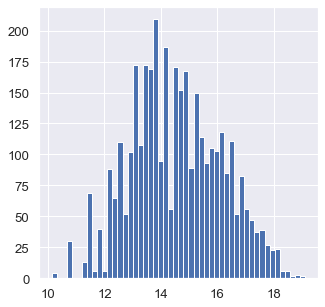

In [57]:
# check the distribution of market_value after being log transformed
hist = trainset['market_value'].hist(bins=50, figsize=(5,5))

In [58]:
testset['market_value'] = np.log(testset['market_value']+1)

#### 3.3.2 Log Transform the Club Market Value

In [59]:
trainset['club_mv'] = np.log(trainset['club_mv']+1)
trainset['club_mv'].describe()

count   3618.00
mean      18.21
std        1.17
min       16.10
25%       17.21
50%       18.15
75%       19.02
max       20.87
Name: club_mv, dtype: float64

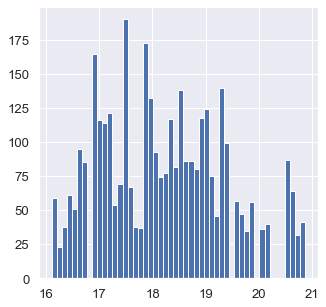

In [60]:
hist = trainset['club_mv'].hist(bins=50, figsize=(5,5))

In [61]:
testset['club_mv'] = np.log(testset['club_mv']+1)

#### 3.3.3 Log Transform the Player Popularity

In [62]:
trainset['google_search'] = np.log(trainset['google_search']+1)
trainset['twitter_avgretweets'] = np.log(trainset['twitter_avgretweets']+1)
trainset['twitter_avglikes'] = np.log(trainset['twitter_avglikes']+1)
trainset['youtube_avgview'] = np.log(trainset['youtube_avgview']+1)
trainset['youtube_avglike'] = np.log(trainset['youtube_avglike']+1)
trainset['youtube_avgdislike'] = np.log(trainset['youtube_avgdislike']+1)
trainset['youtube_avgcomment'] = np.log(trainset['youtube_avgcomment']+1)

trainset_popularity = trainset[['google_search', 'twitter_avgretweets',\
                                'twitter_avglikes', 'youtube_avgview', 'youtube_avglike',\
                                'youtube_avgdislike', 'youtube_avgcomment']].copy()

In [63]:
trainset_popularity.describe()

,google_search,twitter_avgretweets,twitter_avglikes,youtube_avgview,youtube_avglike,youtube_avgdislike,youtube_avgcomment
count,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00,3618.00
mean,11.88,0.21,0.33,7.10,3.82,1.59,2.15
std,1.65,0.95,1.43,4.19,2.92,1.85,2.13
min,6.48,0.00,0.00,0.00,0.00,0.00,0.00
25%,10.70,0.00,0.00,5.40,1.10,0.00,0.00
50%,11.62,0.00,0.00,7.86,3.83,0.88,1.70
75%,12.85,0.00,0.00,10.01,5.78,2.53,3.61
max,18.56,7.51,9.41,16.92,11.89,9.14,9.17


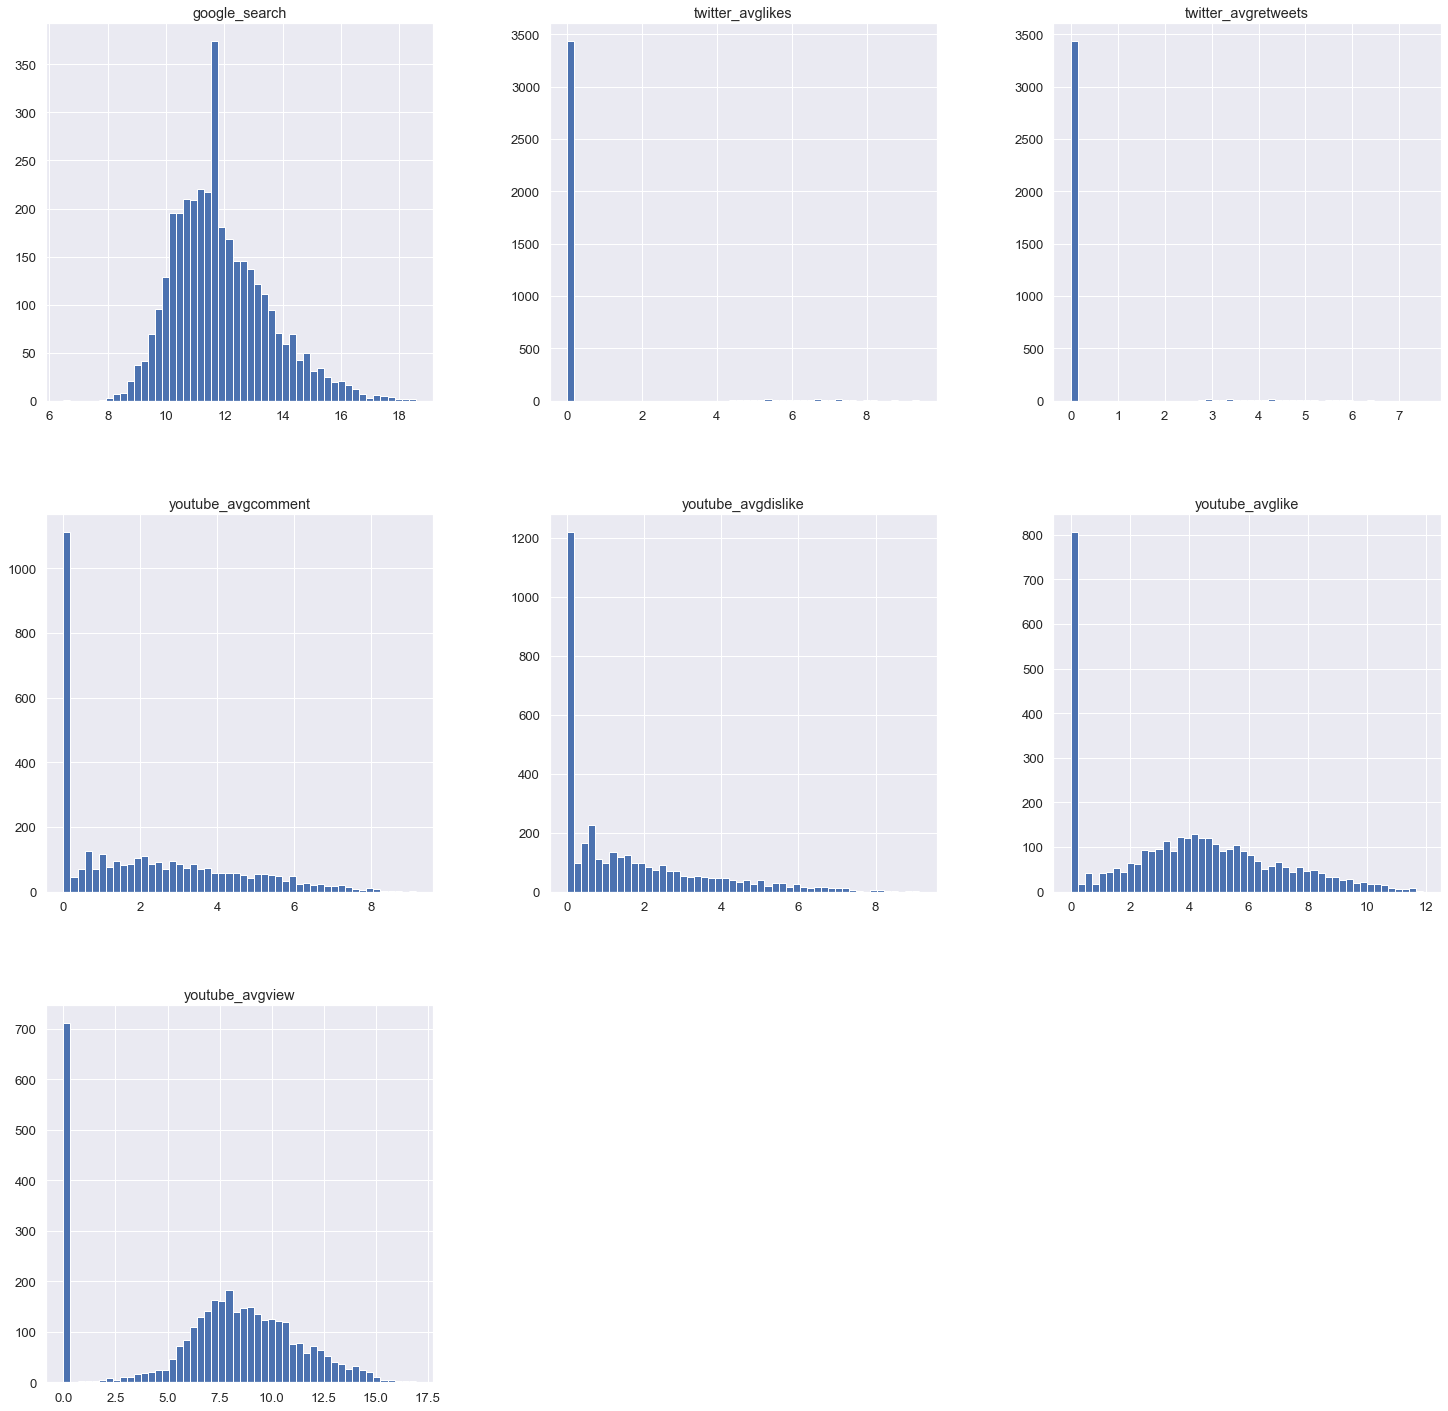

In [64]:
hist = trainset_popularity.hist(bins=50, figsize=(25,25))

In [65]:
# all the popularity are skewed, its better to log tranform all the columns
testset['google_search'] = np.log(testset['google_search']+1)
testset['twitter_avgretweets'] = np.log(testset['twitter_avgretweets']+1)
testset['twitter_avglikes'] = np.log(testset['twitter_avglikes']+1)
testset['youtube_avgview'] = np.log(testset['youtube_avgview']+1)
testset['youtube_avglike'] = np.log(testset['youtube_avglike']+1)
testset['youtube_avgdislike'] = np.log(testset['youtube_avgdislike']+1)
testset['youtube_avgcomment'] = np.log(testset['youtube_avgcomment']+1)

### 3.4 Feature Selection

In [66]:
# drop unnecessary features 
trainset.drop(['player_name', 'nationality', 'club_name', 'league'], inplace=True, axis=1)

In [67]:
# drop unnecessary features 
testset.drop(['player_name', 'nationality', 'club_name', 'league'], inplace=True, axis=1)

### 3.5 Feature Engineering

#### 1. Shots Accuracy

In [68]:
# create 'shots accuracy' 
trainset['shots_accuracy']=trainset['shots_on']/trainset['shots_total']

# check nan and fill it with 0 
trainset[np.isnan(trainset['shots_accuracy'])]
trainset['shots_accuracy'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['shots_accuracy']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['shots_accuracy'].notna()]

# check max and min
trainset['shots_accuracy'].min()
trainset['shots_accuracy'].max()

# testset

# create 'shots accuracy' 
testset['shots_accuracy']=testset['shots_on']/testset['shots_total']

# check nan and fill it with 0 
testset[np.isnan(testset['shots_accuracy'])]
testset['shots_accuracy'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['shots_accuracy']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['shots_accuracy'].notna()]

#### 2. Duels Accuracy

In [69]:
# create 'duels accuracy'
trainset['duels_accuracy']=trainset['duels_won']/trainset['duels_total']

# check nan and fill it with 0 
trainset[np.isnan(trainset['duels_accuracy'])]
trainset['duels_accuracy'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['duels_accuracy']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['duels_accuracy'].notna()]

# check max and min
trainset['duels_accuracy'].min()
trainset['duels_accuracy'].max()

# testset

# create 'duels accuracy'
testset['duels_accuracy']=testset['duels_won']/testset['duels_total']

# check nan and fill it with 0 
testset[np.isnan(testset['duels_accuracy'])]
testset['duels_accuracy'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['duels_accuracy']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[trainset['duels_accuracy'].notna()]

C:\Users\Cynthia Suprihanta\anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


#### 3. Dribbles Accuracy

In [70]:
# create 'dribbles accuracy' 
trainset['dribbles_accuracy']=trainset['dribbles_success']/trainset['dribbles_attempts']

# check nan and fill it with 0 
trainset[np.isnan(trainset['dribbles_accuracy'])]
trainset['dribbles_accuracy'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['dribbles_accuracy']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['dribbles_accuracy'].notna()]

# check max and min
trainset['dribbles_accuracy'].min()
trainset['dribbles_accuracy'].max()

# testset

# create 'dribbles accuracy' 
testset['dribbles_accuracy']=testset['dribbles_success']/testset['dribbles_attempts']

# check nan and fill it with 0 
testset[np.isnan(testset['dribbles_accuracy'])]
testset['dribbles_accuracy'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['dribbles_accuracy']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[trainset['dribbles_accuracy'].notna()]

C:\Users\Cynthia Suprihanta\anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


#### 4. Goals Per Game

In [71]:
# create 'goals per game'
trainset['goals_pg']=trainset['goals_total']/trainset['games_appearences']

# check nan and fill it with 0 
trainset[np.isnan(trainset['goals_pg'])]
trainset['goals_pg'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['goals_pg']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['goals_pg'].notna()]

# check max and min
trainset['goals_pg'].min()
trainset['goals_pg'].max()

#testset
# create 'goals per game'
testset['goals_pg']=testset['goals_total']/testset['games_appearences']

# check nan and fill it with 0 
testset[np.isnan(testset['goals_pg'])]
testset['goals_pg'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['goals_pg']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[trainset['goals_pg'].notna()]

C:\Users\Cynthia Suprihanta\anaconda\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


#### 5. Assists Per Game

In [72]:
# create 'assists per game'
trainset['assists_pg']=trainset['goals_assists']/trainset['games_appearences']

# check nan and fill it with 0 
trainset[np.isnan(trainset['assists_pg'])]
trainset['assists_pg'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['assists_pg']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['assists_pg'].notna()]

# check max and min
trainset['assists_pg'].min()
trainset['assists_pg'].max()

# testset
# create 'assists per game'
testset['assists_pg']=testset['goals_assists']/testset['games_appearences']

# check nan and fill it with 0 
testset[np.isnan(testset['assists_pg'])]
testset['assists_pg'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['assists_pg']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['assists_pg'].notna()]

#### 6. Conceded Per Game

In [73]:
# create 'conceded per game'
trainset['conceded_pg']=trainset['goals_conceded']/trainset['games_appearences']

# check nan and fill it with 0 
trainset[np.isnan(trainset['conceded_pg'])]
trainset['conceded_pg'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['conceded_pg']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['conceded_pg'].notna()]

# check max and min
trainset['conceded_pg'].min()
trainset['conceded_pg'].max()

# testset
# create 'conceded per game'
testset['conceded_pg']=testset['goals_conceded']/testset['games_appearences']

# check nan and fill it with 0 
testset[np.isnan(testset['conceded_pg'])]
testset['conceded_pg'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['conceded_pg']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['conceded_pg'].notna()]

#### 7. Tackles Per Game

In [74]:
# create 'tackles per game'
trainset['tackles_pg']=trainset['tackles_total']/trainset['games_appearences']

# check nan and fill it with 0 
trainset[np.isnan(trainset['tackles_pg'])]
trainset['tackles_pg'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['tackles_pg']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['tackles_pg'].notna()]

# check max and min
trainset['tackles_pg'].min()
trainset['tackles_pg'].max()


# testset
# create 'tackles per game'
testset['tackles_pg']=testset['tackles_total']/testset['games_appearences']

# check nan and fill it with 0 
testset[np.isnan(testset['tackles_pg'])]
testset['tackles_pg'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['tackles_pg']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['tackles_pg'].notna()]

#### 8. Duels Per Game

In [75]:
# create 'duels per game'
trainset['duels_pg']=trainset['duels_total']/trainset['games_appearences']

# check nan and fill it with 0 
trainset[np.isnan(trainset['duels_pg'])]
trainset['duels_pg'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['duels_pg']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['duels_pg'].notna()]

# check max and min
trainset['duels_pg'].min()
trainset['duels_pg'].max()

# testset
# create 'duels per game'
testset['duels_pg']=testset['duels_total']/testset['games_appearences']

# check nan and fill it with 0 
testset[np.isnan(testset['duels_pg'])]
testset['duels_pg'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['duels_pg']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['duels_pg'].notna()]

#### 9. Passes Per Game

In [76]:
# create 'passes per game'
trainset['passes_pg']=trainset['passes_total']/trainset['games_appearences']

# check nan and fill it with 0 
trainset[np.isnan(trainset['passes_pg'])]
trainset['passes_pg'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['passes_pg']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['passes_pg'].notna()]

# check max and min
trainset['passes_pg'].min()
trainset['passes_pg'].max()

#testset
# create 'passes per game'
testset['passes_pg']=testset['passes_total']/testset['games_appearences']

# check nan and fill it with 0 
testset[np.isnan(testset['passes_pg'])]
testset['passes_pg'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['passes_pg']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['passes_pg'].notna()]

#### 10. Dribbles Per Game

In [77]:
# create 'dribbles per game'
trainset['dribbles_pg']=trainset['dribbles_attempts']/trainset['games_appearences']

# check nan and fill it with 0 
trainset[np.isnan(trainset['dribbles_pg'])]
trainset['dribbles_pg'].fillna(0,inplace= True)

# check inf and delete the row
trainset.loc[trainset['dribbles_pg']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['dribbles_pg'].notna()]

# check max and min
trainset['dribbles_pg'].min()
trainset['dribbles_pg'].max()

# testset
# create 'dribbles per game'
testset['dribbles_pg']=testset['dribbles_attempts']/testset['games_appearences']

# check nan and fill it with 0 
testset[np.isnan(testset['dribbles_pg'])]
testset['dribbles_pg'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['dribbles_pg']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['dribbles_pg'].notna()]

#### 11. Club Contribution

In [78]:
# create club contribution (games appearances/total game of the club)
trainset['club_contribution']=(trainset['games_appearences'])/trainset['club_match_played']

# check nan and fill it with 0 
trainset[np.isnan(trainset['club_contribution'])]
trainset['club_contribution'].fillna(0,inplace= True)

# check inf
trainset.loc[trainset['club_contribution']==np.inf]
trainset=trainset.replace([np.inf, -np.inf], np.nan)
trainset=trainset[trainset['club_contribution'].notna()]

# check max and min
trainset['club_contribution'].min()
trainset['club_contribution'].max()

# check the club cont > 1 and drop it since the data is wrong
trainset = trainset.drop(trainset[trainset['club_contribution'] > 1].index)

# testset
# create club contribution (games appearances/total game of the club)
testset['club_contribution']=(testset['games_appearences'])/testset['club_match_played']

# check nan and fill it with 0 
testset[np.isnan(testset['club_contribution'])]
testset['club_contribution'].fillna(0,inplace= True)

# check inf and delete the row
testset.loc[testset['club_contribution']==np.inf]
testset=testset.replace([np.inf, -np.inf], np.nan)
testset=testset[testset['club_contribution'].notna()]

# check the club cont > 1 and drop it since the data is wrong
testset = testset.drop(testset[testset['club_contribution'] > 1].index)

### 3.6 Feature Scalling

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

trainset_target = trainset["market_value"].values
trainset_predictors = trainset.drop("market_value", axis=1)

# fit_transform returns a NumPy array, so we need to put it back 
# into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
trainset['market_value'] = trainset_target

# inspect the data
trainset.head()

,age,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,club_total_goals,club_goals_conceded,contract_expired,height,...,dribbles_accuracy,goals_pg,assists_pg,conceded_pg,tackles_pg,duels_pg,passes_pg,dribbles_pg,club_contribution,market_value
0,0.14,-0.88,-1.73,-1.36,0.66,0.14,-1.40,-1.10,-1.17,0.44,...,-1.39,-0.60,0.61,-0.15,-0.00,0.27,0.76,-0.75,-0.62,13.59
1,-1.90,0.50,-1.73,0.52,-0.26,-1.40,-0.20,-1.55,-0.27,0.13,...,-0.52,0.60,-0.57,-0.15,-0.32,-0.08,-0.68,1.12,-0.95,13.71
2,-0.54,-0.20,0.99,-0.51,0.66,0.72,-0.43,0.89,-1.25,0.13,...,0.79,-0.60,-0.57,-0.15,1.18,0.63,-0.37,0.18,-1.11,15.76
3,0.14,-1.28,-0.37,-0.85,0.66,0.33,-0.71,-0.44,-0.27,-1.24,...,-0.47,-0.00,-0.57,-0.15,1.01,0.54,0.42,-0.08,-0.36,13.82
4,2.19,0.93,-1.73,1.20,-1.47,-1.40,0.49,-1.47,-0.27,-0.63,...,1.66,-0.60,-0.57,-0.15,-0.09,-0.52,0.18,-0.69,0.04,10.82


In [80]:
testset_target = testset["market_value"].values
testset_predictors = testset.drop("market_value", axis=1)

scaled_vals = scaler.transform(testset_predictors)
testset = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled target back in
testset['market_value'] = testset_target

testset.head()

,age,club_mv,club_match_played,club_match_won,club_match_draw,club_match_lose,club_total_goals,club_goals_conceded,contract_expired,height,...,dribbles_accuracy,goals_pg,assists_pg,conceded_pg,tackles_pg,duels_pg,passes_pg,dribbles_pg,club_contribution,market_value
0,0.82,2.26,0.99,2.22,0.05,-1.97,2.39,-0.96,1.69,1.05,...,0.44,-0.60,-0.23,-0.15,1.11,0.72,2.08,-0.35,1.31,17.73
1,-0.08,0.94,-0.37,2.40,-1.47,-1.97,1.47,-2.14,0.71,-1.40,...,0.29,0.14,2.55,-0.15,0.21,0.77,0.17,2.20,1.57,16.91
2,-0.31,1.58,0.99,1.88,-0.56,-1.20,1.47,-0.96,-0.27,0.59,...,-0.05,3.47,0.44,-0.15,-0.52,0.12,-0.38,-0.32,1.31,17.50
3,-0.99,0.57,0.99,-0.34,0.35,0.72,-0.54,0.30,0.71,-0.02,...,-0.24,-0.60,-0.57,-0.15,0.44,-0.19,-0.01,-0.18,-0.59,14.51
4,-1.67,-0.02,-1.73,-1.19,1.87,-0.82,-1.17,-1.55,-0.27,-0.94,...,0.44,-0.60,-0.57,-0.15,0.35,0.16,-0.94,0.81,-1.38,12.77


### 3.7 Outliers Detection

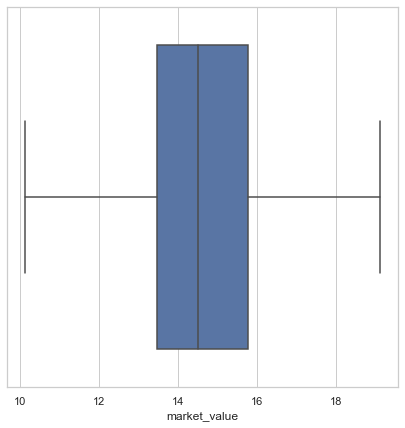

In [81]:
# detect outliers with boxplot

sns.set(style="whitegrid")
mv = sns.boxplot(x=trainset["market_value"])

#### Notes: #####
1. There is no outliers detected in market value after it being log-transformed.

# 4. Export the Pre-Processed Data

In [82]:
# os.chdir('C:/Users/Cynthia Suprihanta/OneDrive/Aston University/Business Project/data/overall')
# trainset.to_csv('Final Trainset.csv',index=False,encoding='utf-8-sig')
# testset.to_csv('Final Testset.csv',index=False,encoding='utf-8-sig')